# Laboratory session 6
***

**Author:** Rinaldi Luca 

### Exercise 1
***

In [1]:
obs <- c(4,1,3,1,3)
n   <- length(obs)

dmu <- 1/200
mu  <- seq(0,8,dmu)
j   <- length(mu)

credibility <- function(x, perc){
                cdf <- cumsum(x)
                for (i in 2:length(x)){
                    if ((1-perc)/2 >= cdf[i-1] & (1-perc)/2 < cdf[i]){x1 <- i-1}
                    if ((1+perc)/2 > cdf[i-1] & (1+perc)/2 <= cdf[i]){x2 <- i}
                }
                return(c(x1,x2))
}

#### 1.a)

Supposing a uniform prior
$$
g(\mu)=1 \hspace{0.6cm} for \hspace{0.6cm} \mu > 0
$$

the posterior becomes:
$$
P(\mu | \{ x_j \} ) \propto \mu^{\sum x_j} e^{-n\mu}.
$$

It can be represented by $\mathbf{Gamma}(\alpha,\lambda)$ with $\alpha = \sum x_j +1$ and $\lambda=n$ 

		Mean		Median		Variance
Analytical	2.6		 /		0.52
Computed	2.599999	2.533646	0.5199933

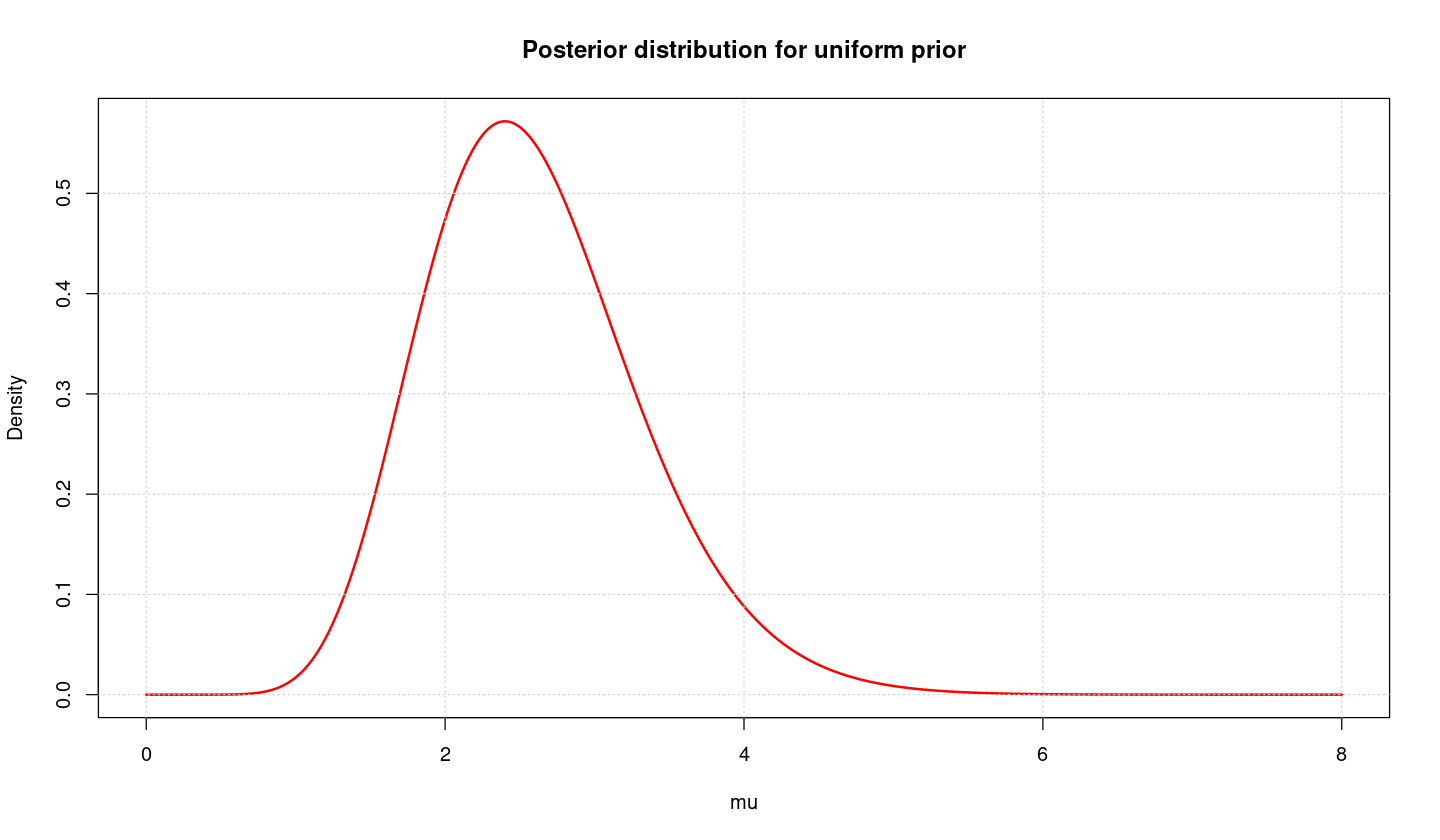

In [2]:
alpha  <- sum(obs)+1
lambda <- n
unif.post <- dgamma(mu,alpha,lambda)
unif.post <- unif.post / (dmu*sum(unif.post[1:j-1]+unif.post[2:j])/2) #normalized

unif.mean <- dmu*sum((unif.post*mu)[1:j-1]+(unif.post*mu)[2:j])/2
unif.var  <- dmu*sum((unif.post*mu*mu)[1:j-1]+(unif.post*mu*mu)[2:j])/2 -
             (dmu*sum((unif.post*mu)[1:j-1]+(unif.post*mu)[2:j])/2)^2
unif.med  <- qgamma(0.5,alpha,lambda)

cat('\t\tMean\t\tMedian\t\tVariance')
cat('\nAnalytical\t',alpha/lambda,'\t\t /\t\t',alpha/(lambda^2),sep='')
cat('\nComputed\t', unif.mean,'\t',unif.med,'\t',unif.var,sep='')
options(repr.plot.width=12, repr.plot.height=7)
plot(mu,unif.post,main='Posterior distribution for uniform prior',xlab='mu',ylab='Density',
     type='l',lwd=2,col='red')
grid()

#### 1.b)

Supposing instead a Jeffrey's prior
$$
g(\mu)=\frac{1}{\sqrt{\mu}} \hspace{0.6cm} for \hspace{0.6cm} \mu > 0
$$

the posterior becomes:
$$
P(\mu | \{ x_j \} ) \propto \mu^{\sum x_j -1/2} e^{-n\mu}.
$$

It can be represented by $\mathbf{Gamma}(\alpha,\lambda)$ with $\alpha = \sum x_j + \frac{1}{2}$ and $\lambda=n$ 

		Mean		Median		Variance
Analytical	2.5		 /		0.5
Computed	2.499999	2.433659	0.4999962

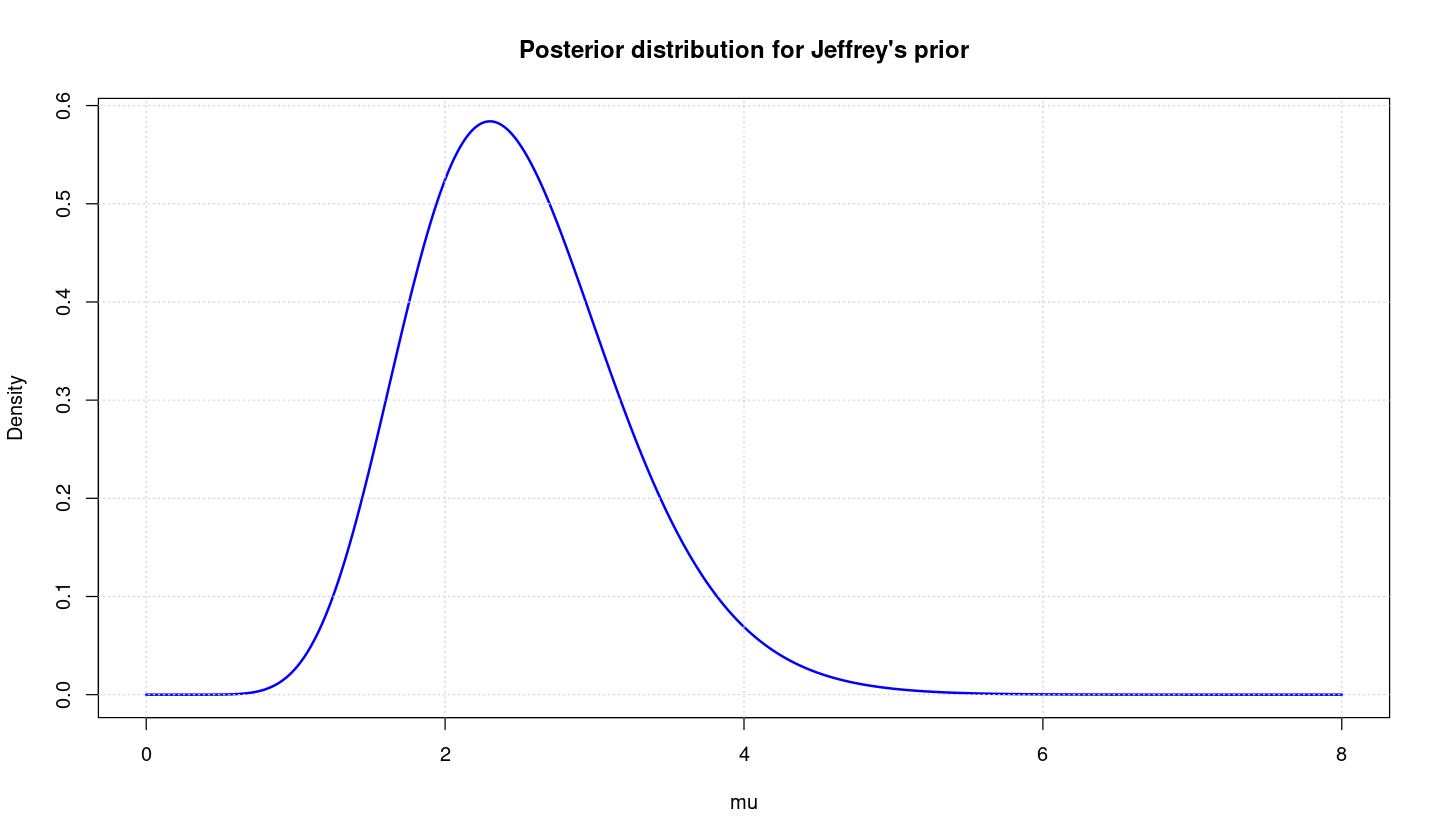

In [3]:
alpha  <- sum(obs)+1/2
lambda <- n
jeff.post <- dgamma(mu,alpha,lambda)
jeff.post <- jeff.post / (dmu*sum(jeff.post[1:j-1]+jeff.post[2:j])/2) #normalized

jeff.mean <- dmu*sum((jeff.post*mu)[1:j-1]+(jeff.post*mu)[2:j])/2
jeff.var  <- dmu*sum((jeff.post*mu*mu)[1:j-1]+(jeff.post*mu*mu)[2:j])/2 -
             (dmu*sum((jeff.post*mu)[1:j-1]+(jeff.post*mu)[2:j])/2)^2
jeff.med  <- qgamma(0.5,alpha,lambda)

cat('\t\tMean\t\tMedian\t\tVariance')
cat('\nAnalytical\t',alpha/lambda,'\t\t /\t\t',alpha/(lambda^2),sep='')
cat('\nComputed\t', jeff.mean,'\t',jeff.med,'\t',jeff.var,sep='')
options(repr.plot.width=12, repr.plot.height=7)
plot(mu,jeff.post,main='Posterior distribution for Jeffrey\'s prior',xlab='mu',ylab='Density',
     type='l',lwd=2,col='blue')
grid()

#### 1.c)

Confidency interval bounds (lower-upper):

Uniform		1.38		4.19
Normal approx.	1.185		4.015
 ----
Jeffrey's	1.305		4.065
Normal approx.	1.11		3.89

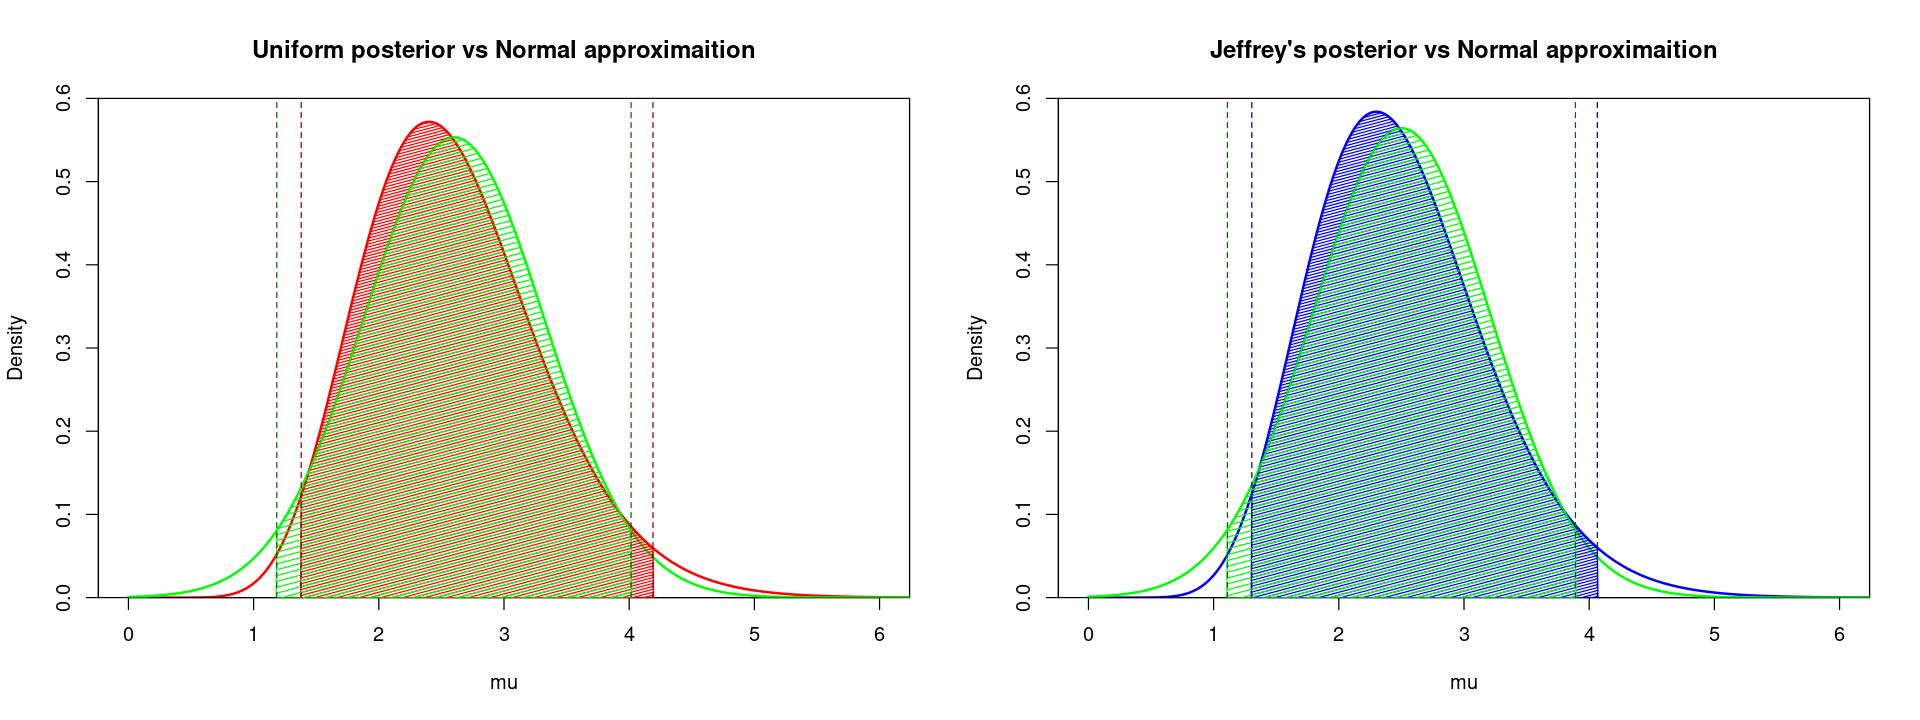

In [4]:
norm.1 <- dnorm(mu,unif.mean,sqrt(unif.var))
norm.2 <- dnorm(mu,jeff.mean,sqrt(jeff.var))

unif.95  <- credibility(unif.post*dmu,0.95)
jeff.95  <- credibility(jeff.post*dmu,0.95)
norm1.95 <- credibility(norm.1*dmu,0.95)
norm2.95 <- credibility(norm.2*dmu,0.95)

cat('Confidency interval bounds (lower-upper):\n')
cat('\nUniform\t\t', mu[unif.95[1]],'\t\t',mu[unif.95[2]], sep='')
cat('\nNormal approx.\t', mu[norm1.95[1]],'\t\t',mu[norm1.95[2]], sep='')
cat('\n ----')
cat('\nJeffrey\'s\t', mu[jeff.95[1]],'\t\t',mu[jeff.95[2]], sep='')
cat('\nNormal approx.\t', mu[norm2.95[1]],'\t\t',mu[norm2.95[2]], sep='')

options(repr.plot.width=16, repr.plot.height=6)
par(mfcol=c(1,2))
plot(mu,unif.post,type='l',lwd=2,col='red',main='Uniform posterior vs Normal approximaition',
     xlab='mu',ylab='Density', xlim=c(0,6), yaxs='i', ylim=c(0,0.6))
lines(mu,norm.1,lwd=2,col='green')
polygon(x = mu[(unif.95[1]-1):(unif.95[2]+1)], y = c(0,unif.post[unif.95[1]:unif.95[2]],0), 
        col='red', density=50 )
polygon(x = mu[(norm1.95[1]-1):(norm1.95[2]+1)], y = c(0,norm.1[norm1.95[1]:norm1.95[2]],0), 
        col='green', density=25 )
abline(v=mu[unif.95[1]], lty=2, col='darkred')
abline(v=mu[unif.95[2]], lty=2, col='darkred')
abline(v=mu[norm1.95[1]], lty=2, col='darkgreen')
abline(v=mu[norm1.95[2]], lty=2, col='darkgreen')

plot(mu,jeff.post,type='l',lwd=2,col='blue',main='Jeffrey\'s posterior vs Normal approximaition',
     xlab='mu',ylab='Density', xlim=c(0,6), yaxs='i', ylim=c(0,0.6))
lines(mu,norm.2,lwd=2,col='green')
polygon(x = mu[(jeff.95[1]-1):(jeff.95[2]+1)], y = c(0,jeff.post[jeff.95[1]:jeff.95[2]],0), 
        col='blue', density=50 )
polygon(x = mu[(norm2.95[1]-1):(norm2.95[2]+1)], y = c(0,norm.2[norm2.95[1]:norm2.95[2]],0), 
        col='green', density=25 )
abline(v=mu[jeff.95[1]], lty=2, col='darkblue')
abline(v=mu[jeff.95[2]], lty=2, col='darkblue')
abline(v=mu[norm2.95[1]], lty=2, col='darkgreen')
abline(v=mu[norm2.95[2]], lty=2, col='darkgreen')

### Exercise 2
***

A lighthouse is located at a position $\alpha$ along the shore and at a distance $\beta$ out at the see, we assign a uniform likelihood on the azimuth angle $\theta_k$:

$$
P(\theta_k | \alpha, \beta) = \frac{1}{\pi}.
$$

Knowing $x_k - \alpha = \beta \tan \theta_k$ we can operate a change of variables:

$$
P(x|\alpha,\beta) = P(\theta|\alpha,\beta) \biggl| \frac{d\theta}{dx} \biggr| = \frac{1}{\pi} \frac{\beta}{\beta^2 + (x-\alpha)^2}.
$$

Supposing $\alpha$ and $\beta$ uncorrelated we have:

$$
P(\alpha,\beta|{x_k}) \propto P({x_k}|\alpha,\beta) P(\alpha)P(\beta)
$$

assuming uniform prior for $\alpha$ and $\beta$ the relation becomes:

$$
P(\alpha,\beta|{x_k}) \propto P({x_k}|\alpha,\beta) = \prod P(x_k | \alpha,\beta)
$$

Taking the natural logarithm of the posterior probability function:

$$
L = \ln P(\alpha, \beta| {x_k}) = const - \sum \ln \bigg[ \beta^2 + (x_k -\alpha)^2 \bigg]
$$

We fix:
$$ -30km \leq \alpha \leq 30km \\
     0 \leq \beta\leq 50km  $$ 

In [5]:
# data generation
generator <- function(N,alpha,beta){
                set.seed(1234)
                theta <- runif(N,-pi/2,pi/2)
                x <- alpha + beta*tan(theta)
                return(x)
             }
a.true <- 13  
b.true <- 28
data   <- generator(2000,a.true,b.true)

The true values are:
alpha= 13 	beta= 28 
The most probable values for 2000 samples are:
alpha= 12.4 	beta= 27.3

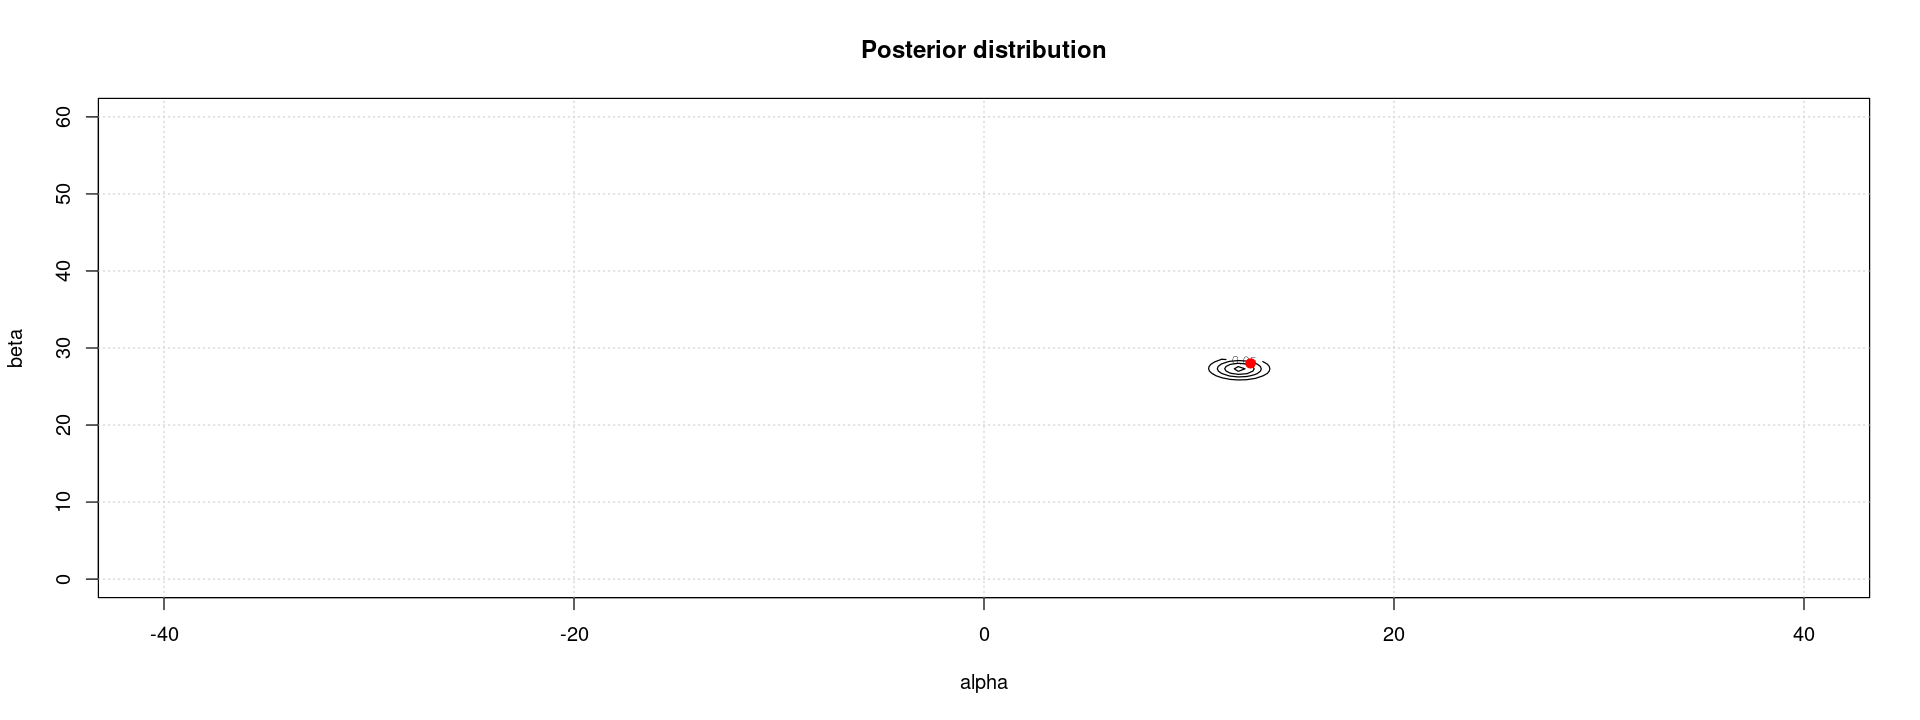

In [6]:
p.log.like <- function(a,b,d){
    logL <- 0.0
    for (x in d){
        logL <- logL +log(b/(pi*(b^2+(x-a)^2)))
    }
    return(logL)
}

n.sample <- 200
a.min <- -40
a.max <- +40
h.a   <- (a.max - a.min)/n.sample
alpha <- seq(from=a.min, by=h.a, length.out=n.sample+1)

b.min <- 0
b.max <- 60
h.b   <- (b.max - b.min)/n.sample
beta <- seq(from=b.min, by=h.b, length.out=n.sample+1)

f <-  Vectorize(function(a,b){p.log.like(a,b,data)})
grid.val <- outer(alpha, beta, f)
grid.val <- grid.val - max(grid.val)
grid.val <- exp(grid.val)/(h.a*h.b*sum(exp(grid.val)))

index <- c(which(grid.val==max(grid.val), arr.ind=TRUE))
max.alpha <- alpha[index[1]]
max.beta <- beta[index[2]]
cat("The true values are:\n")
cat("alpha=",a.true,"\tbeta=",b.true,'\n')
cat("The most probable values for",length(data),"samples are:\n")
cat("alpha=",max.alpha,"\tbeta=",max.beta)
contour(alpha, beta, grid.val, main=paste("Posterior distribution"),
            xlim=c(a.min,a.max), ylim=c(0,b.max), xlab="alpha", ylab="beta",
            nlevels=5) 
points(a.true,b.true, col='red', pch=19)
grid()

### Exercise 3
***

The number of expected photons is $S_k$: 

$$
S_k = \Delta t \Big[ A \exp{\Big(- \frac{(x_k-x_0)^2}{2w^2}\Big)} + B \Big].
$$

The number of observed photons $N$ follows the Poisson distribution and thus the Likelihood of the data is:

$$
P(\{N_j\}|A,B,M) = \prod \frac{S_k^{N_k} e^{-S_k}}{N_k!}.
$$

The model has 5 parameters, but we assume that $x_0$, $w$ and $\Delta t$ are known. 

We want to infer $P(A,B|\{N_k\},M)$ from the data, where $M$ identifies the model.

We only assume that $A$ and $B$ cannot be negative. Therefore, the Prior $P(A,B | M)$ is constant when both $A$ and $B$ are positive, and zero otherwise.

Thus, the Posterior is:

$$
P(A,B|\{N_j\},M) = \frac{1}{Z} \prod_j \frac{S_k^{N_j} e^{-S_k}}{N_j!}
$$

and the log Posterior:

$$
L = \log P(A,B|\{N_j\},M) = const + \sum[N_j \log S_k - S_k]
$$

where the constant term absorbs terms that do not depend on $A$ or $B$.

The best estimates are given by values of $A$ and $B$ that maximize $L$.

#### 3.a)

Change the resolution $w= \{0.1,0.25,1,2,3\}$

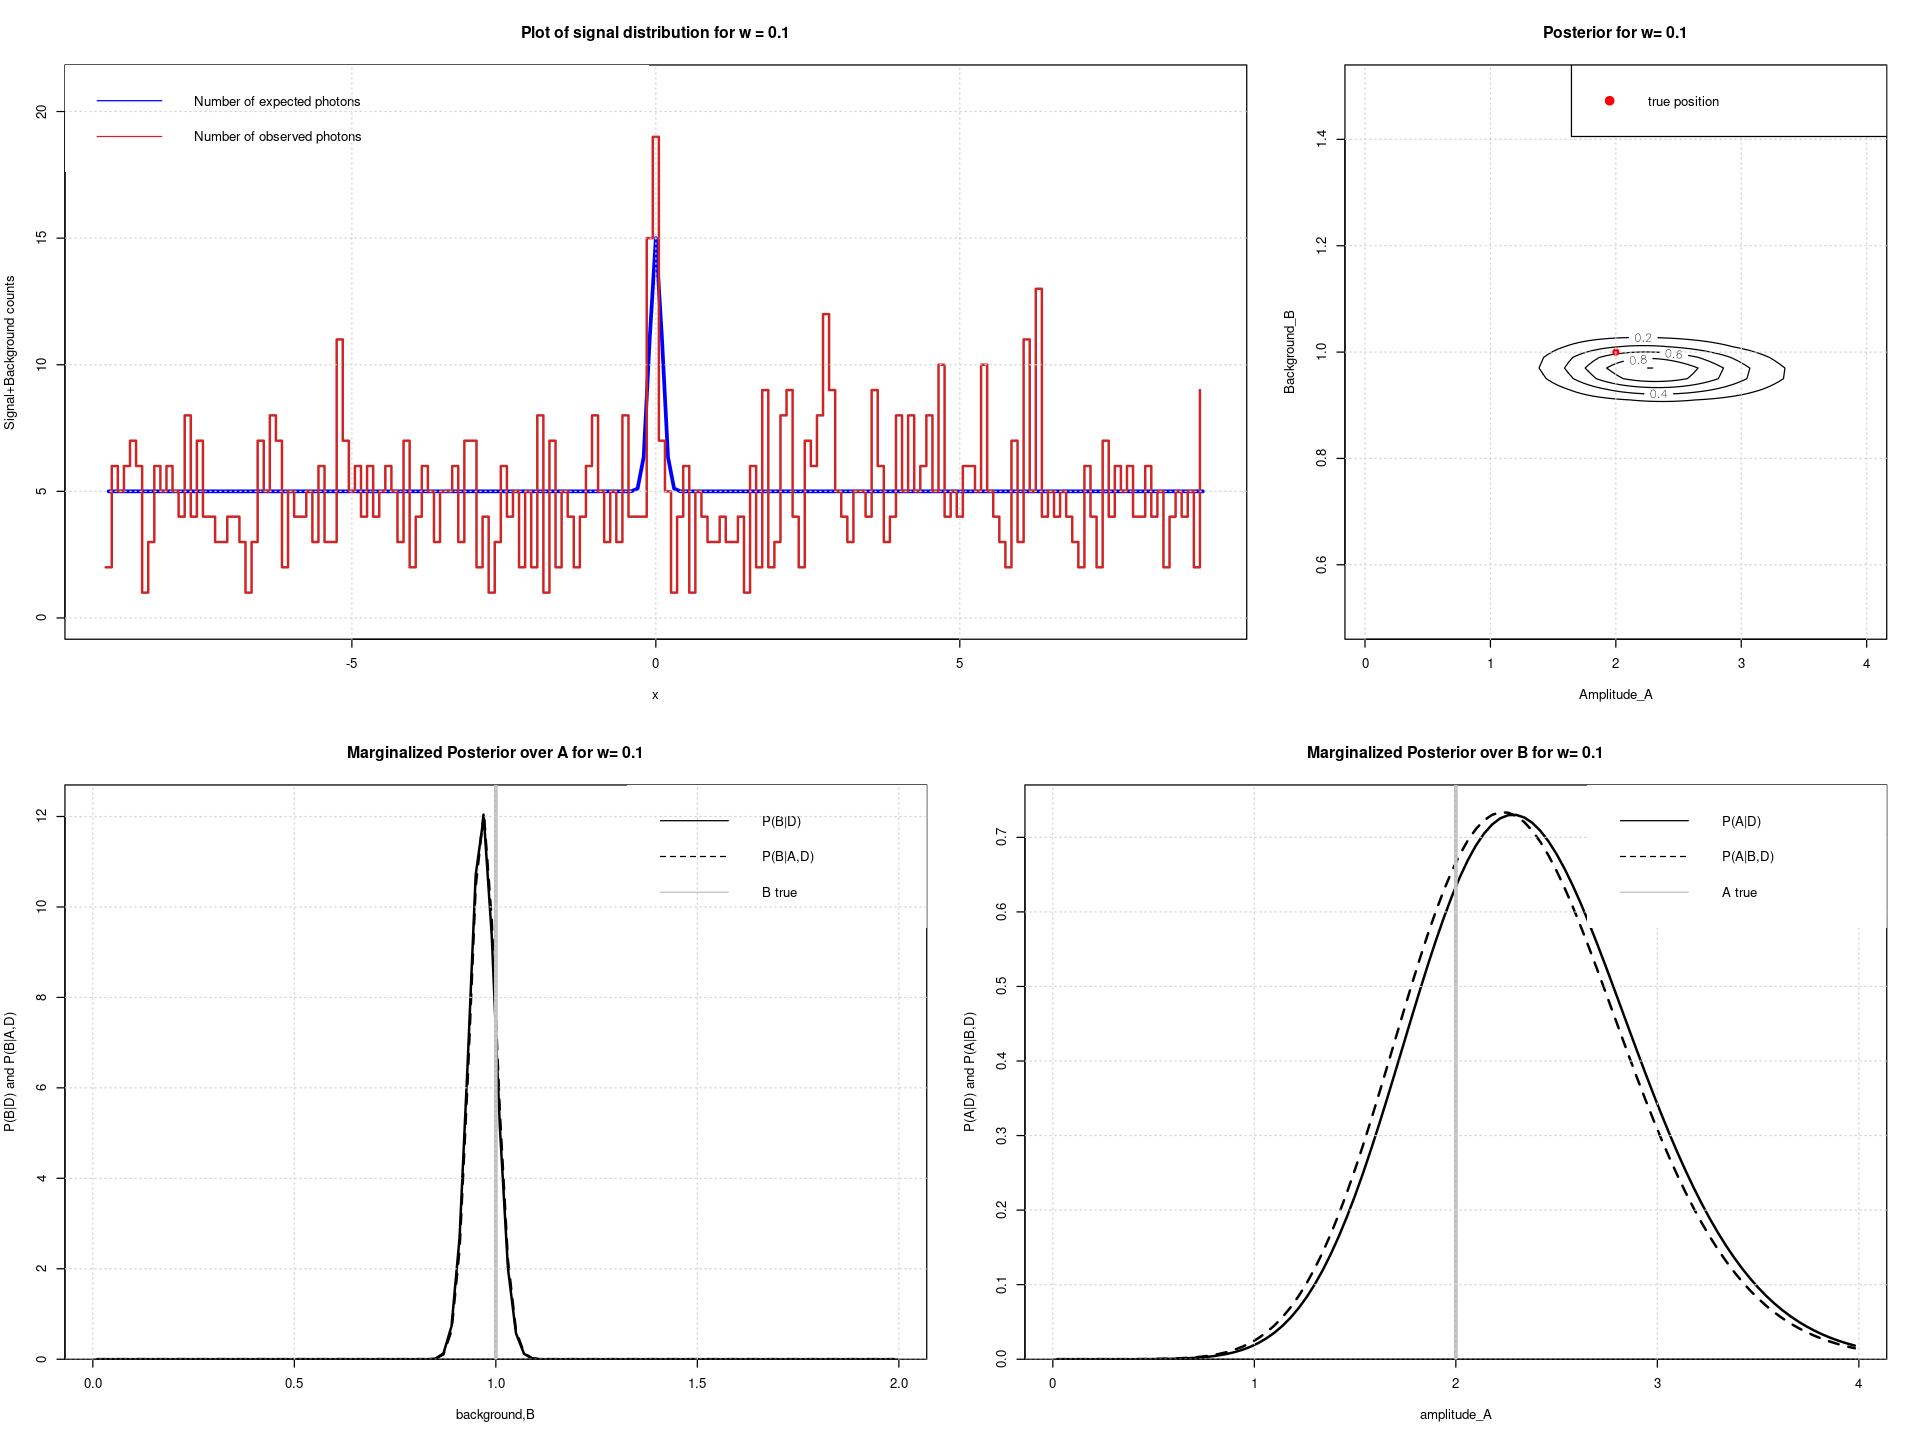

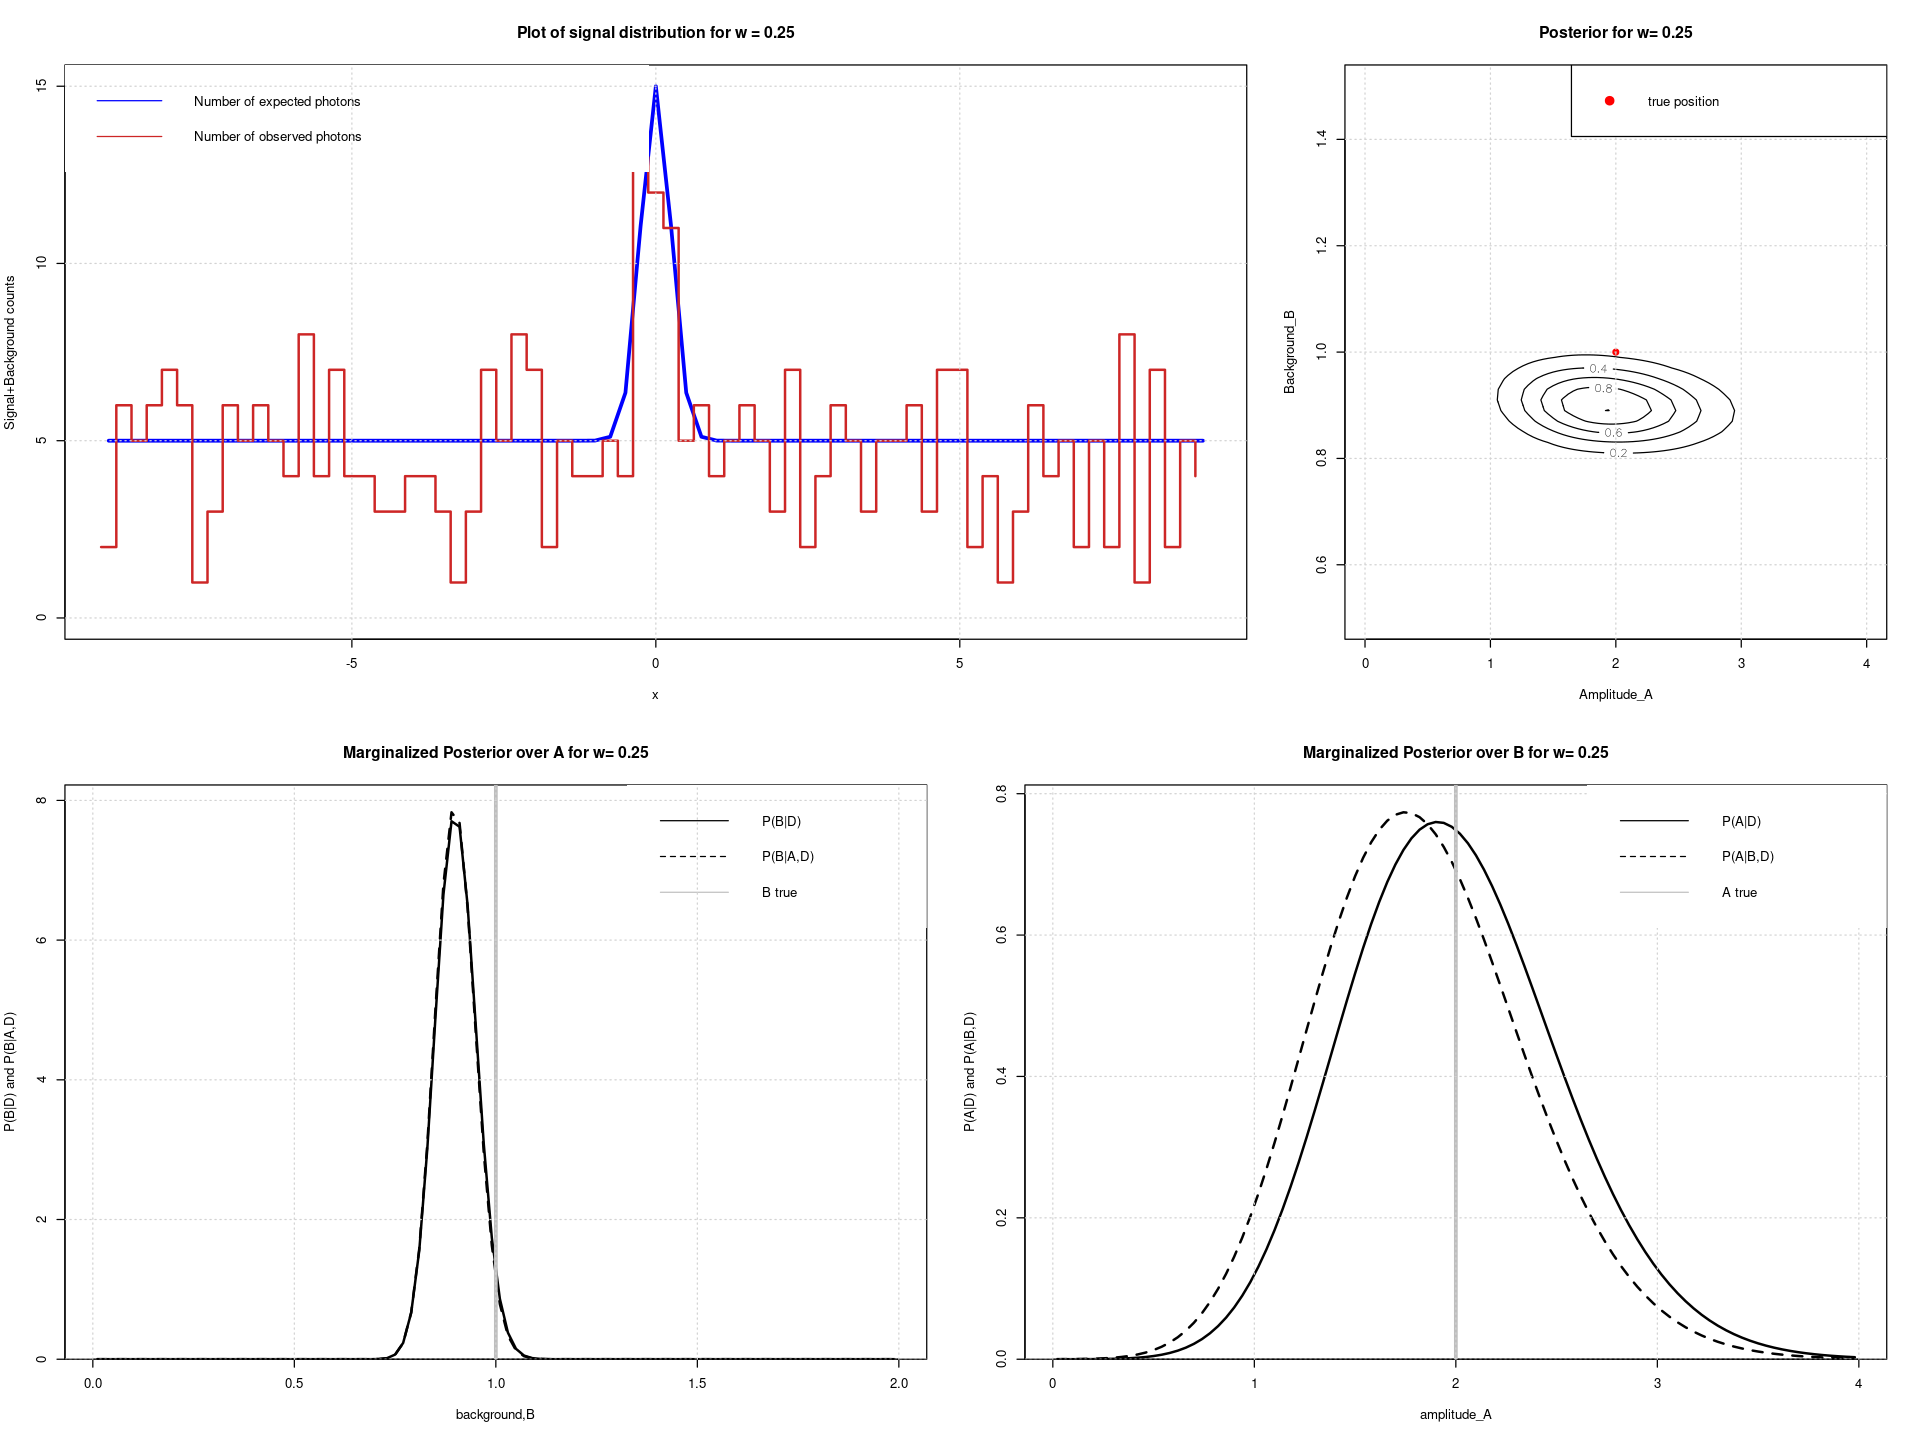

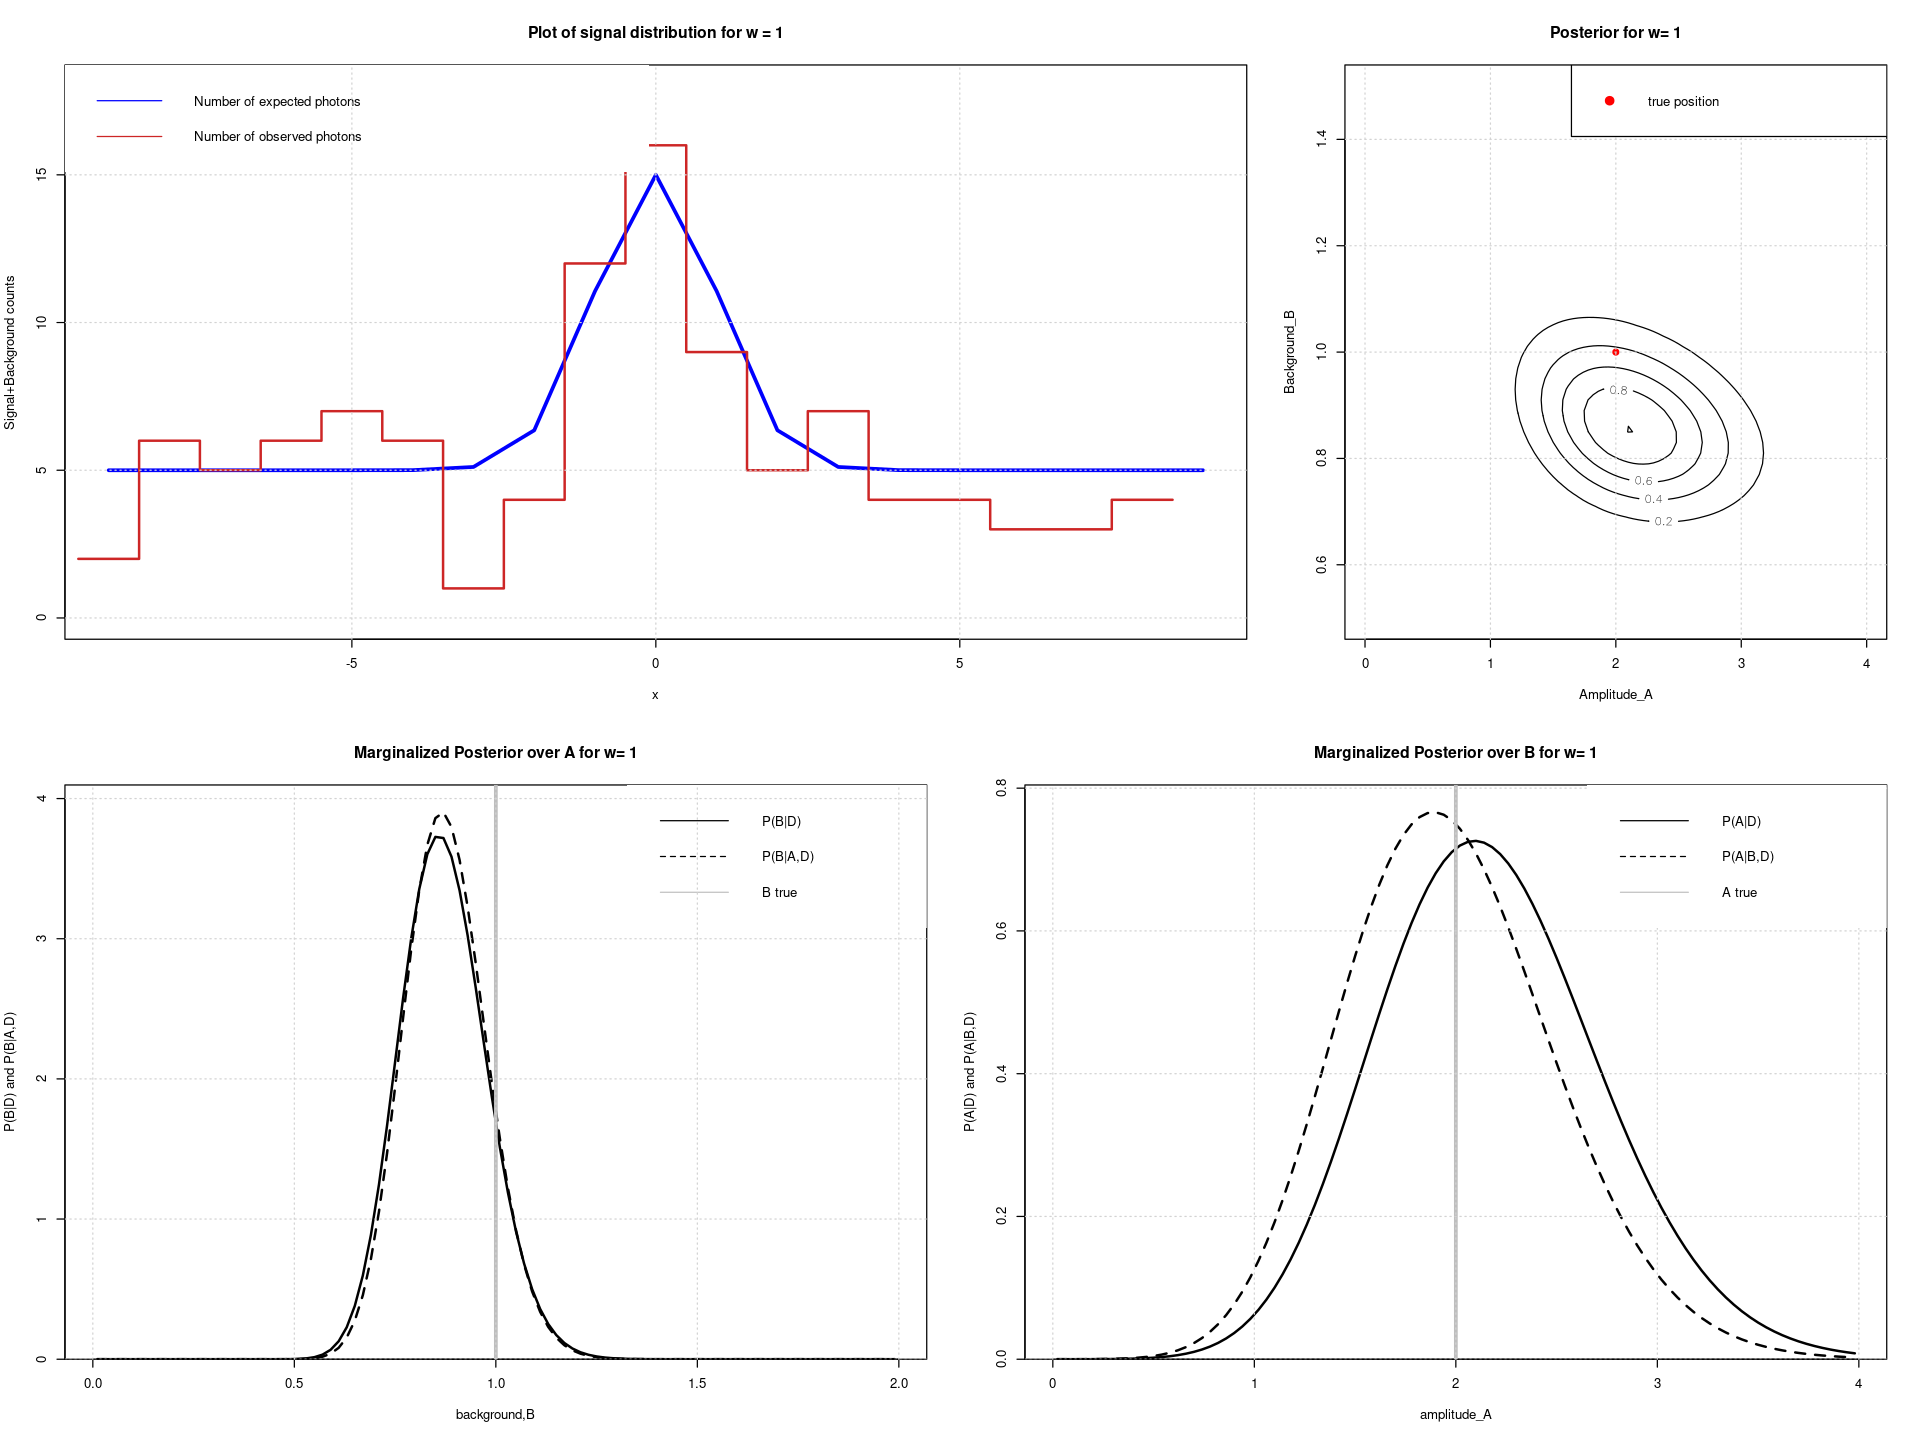

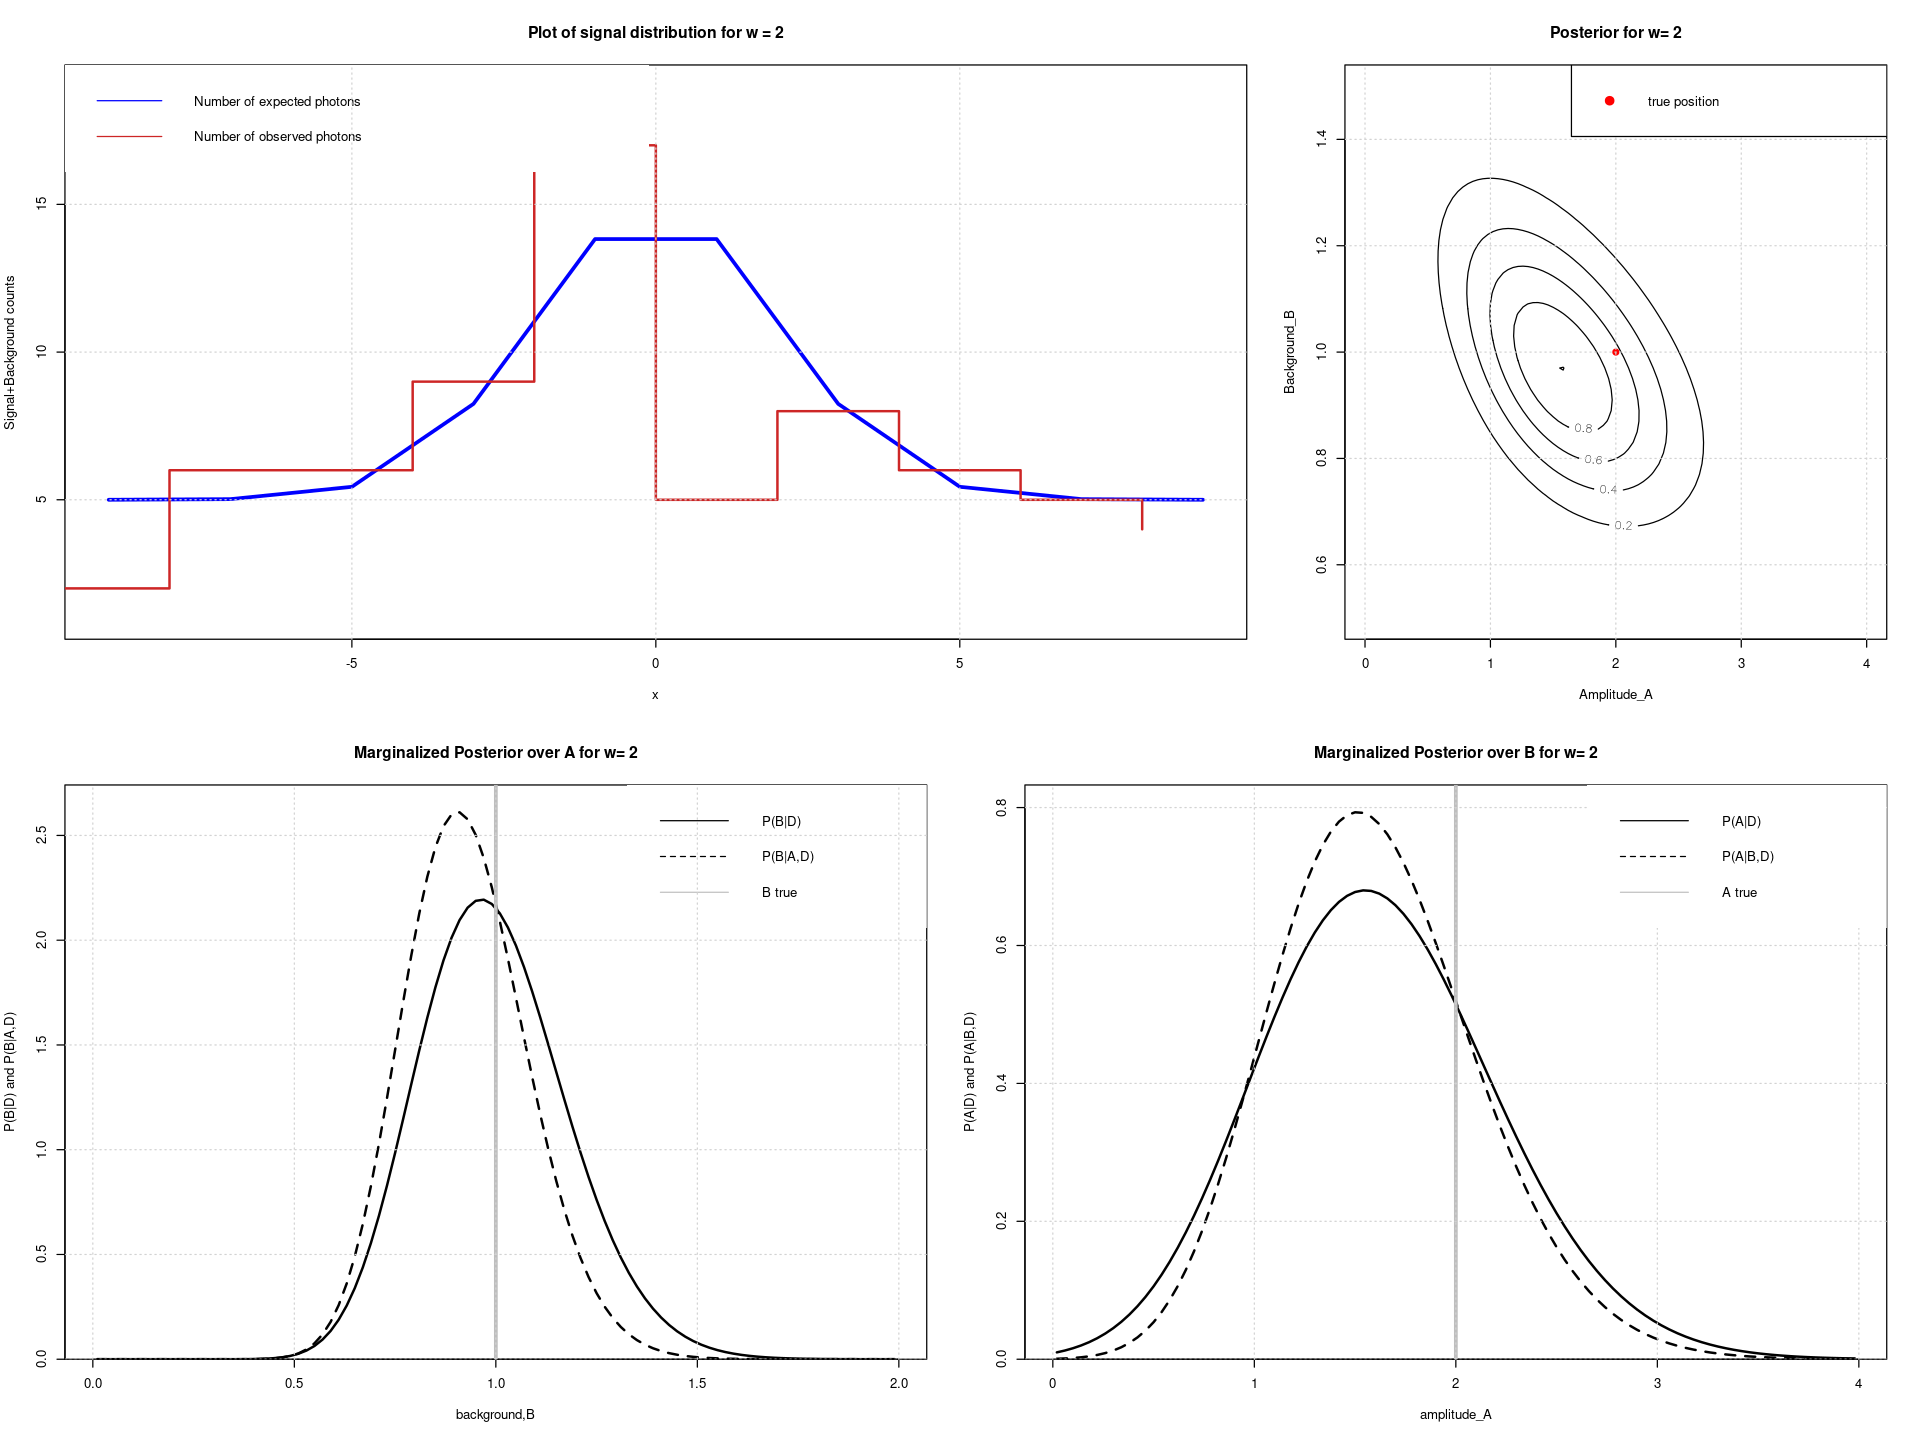

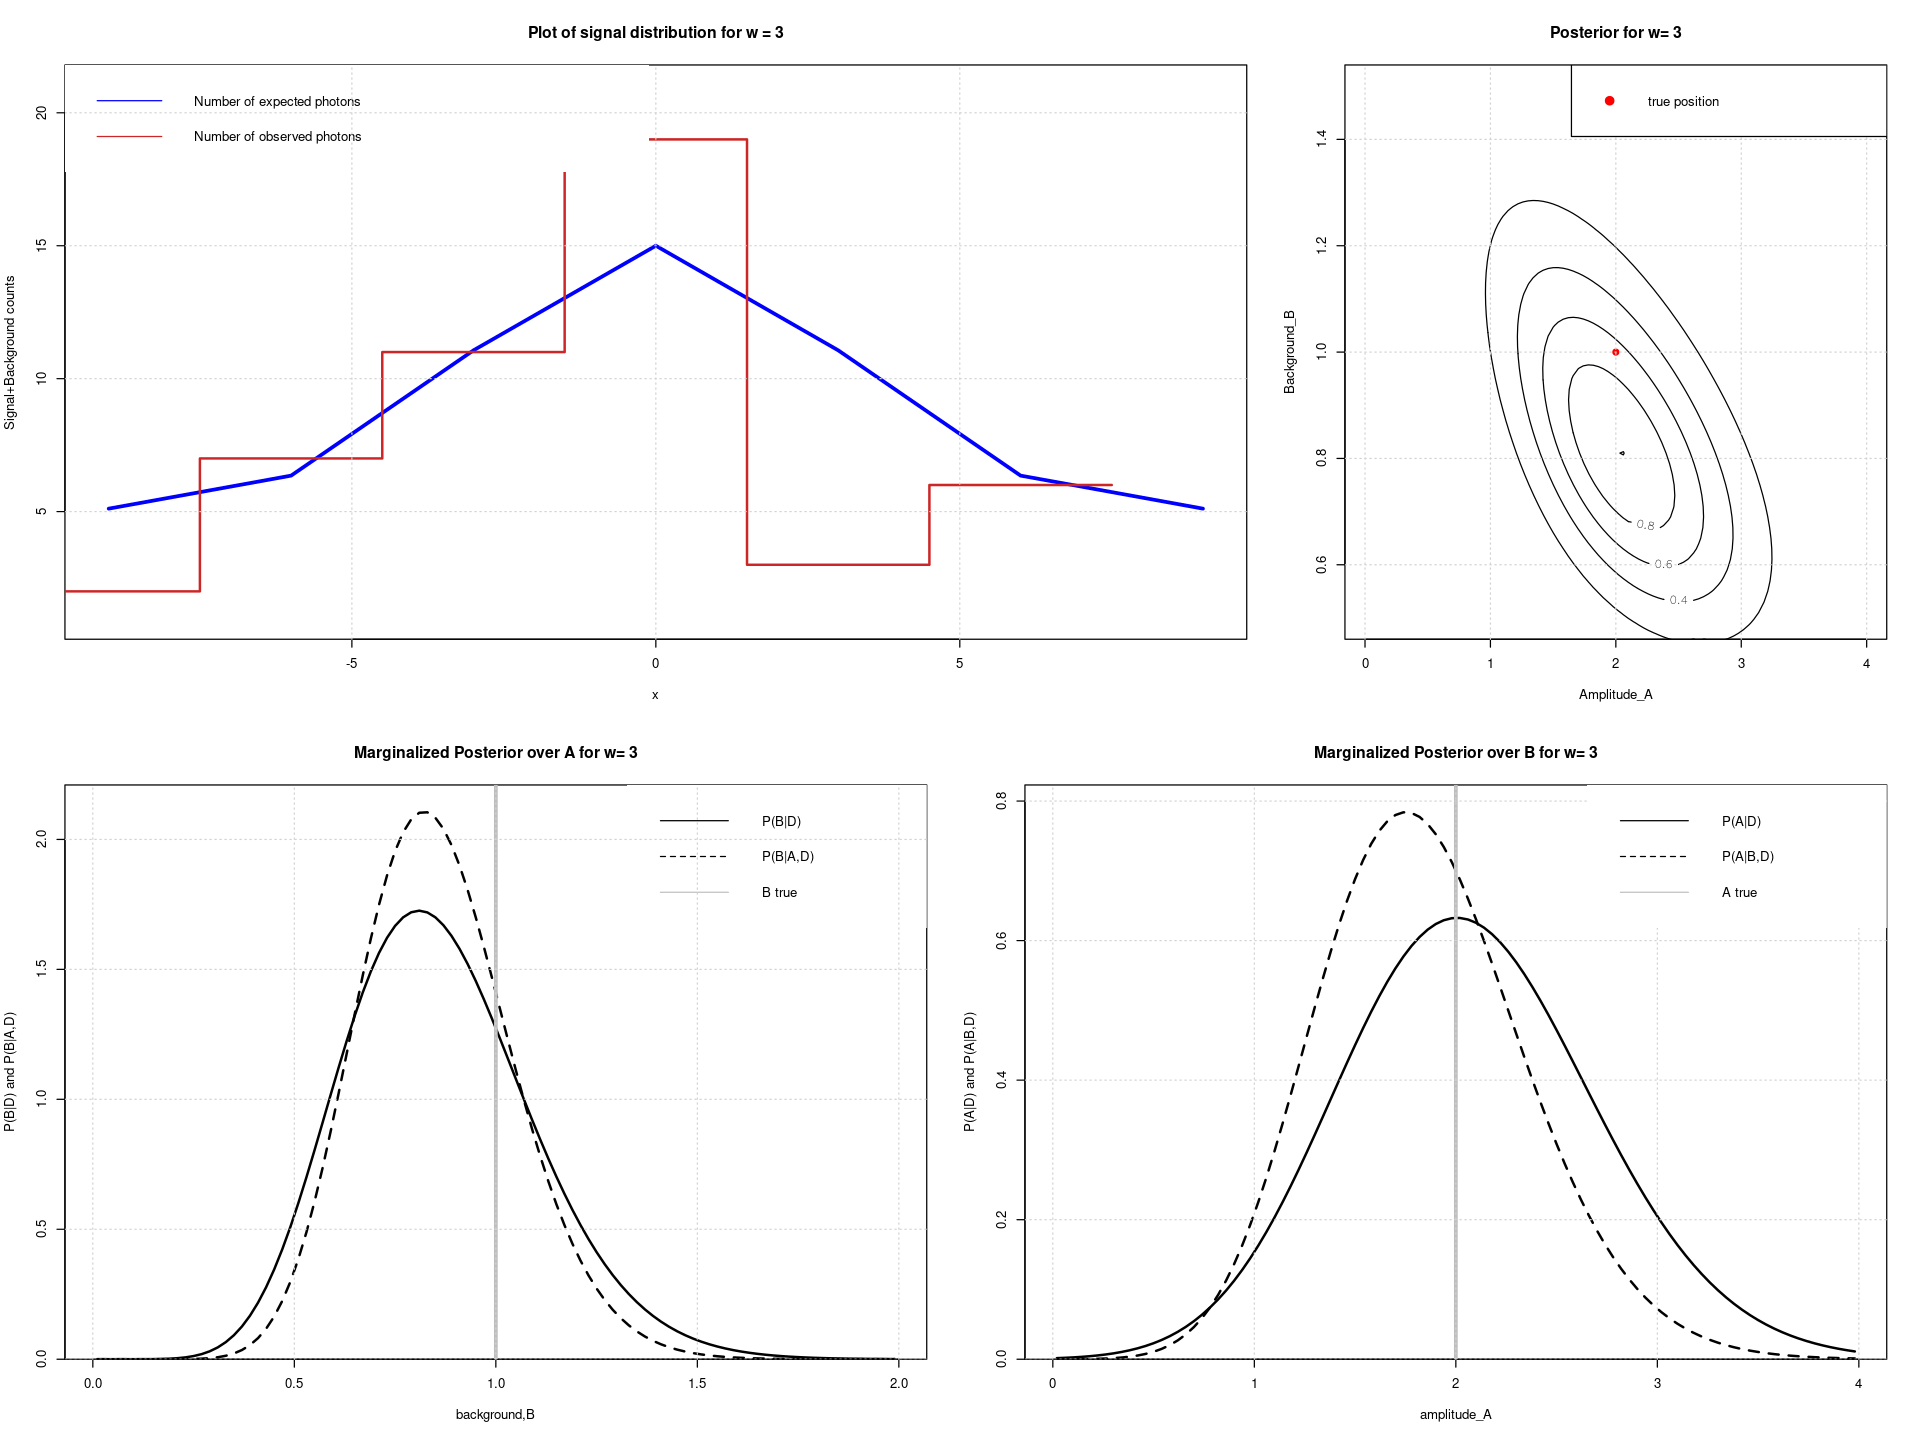

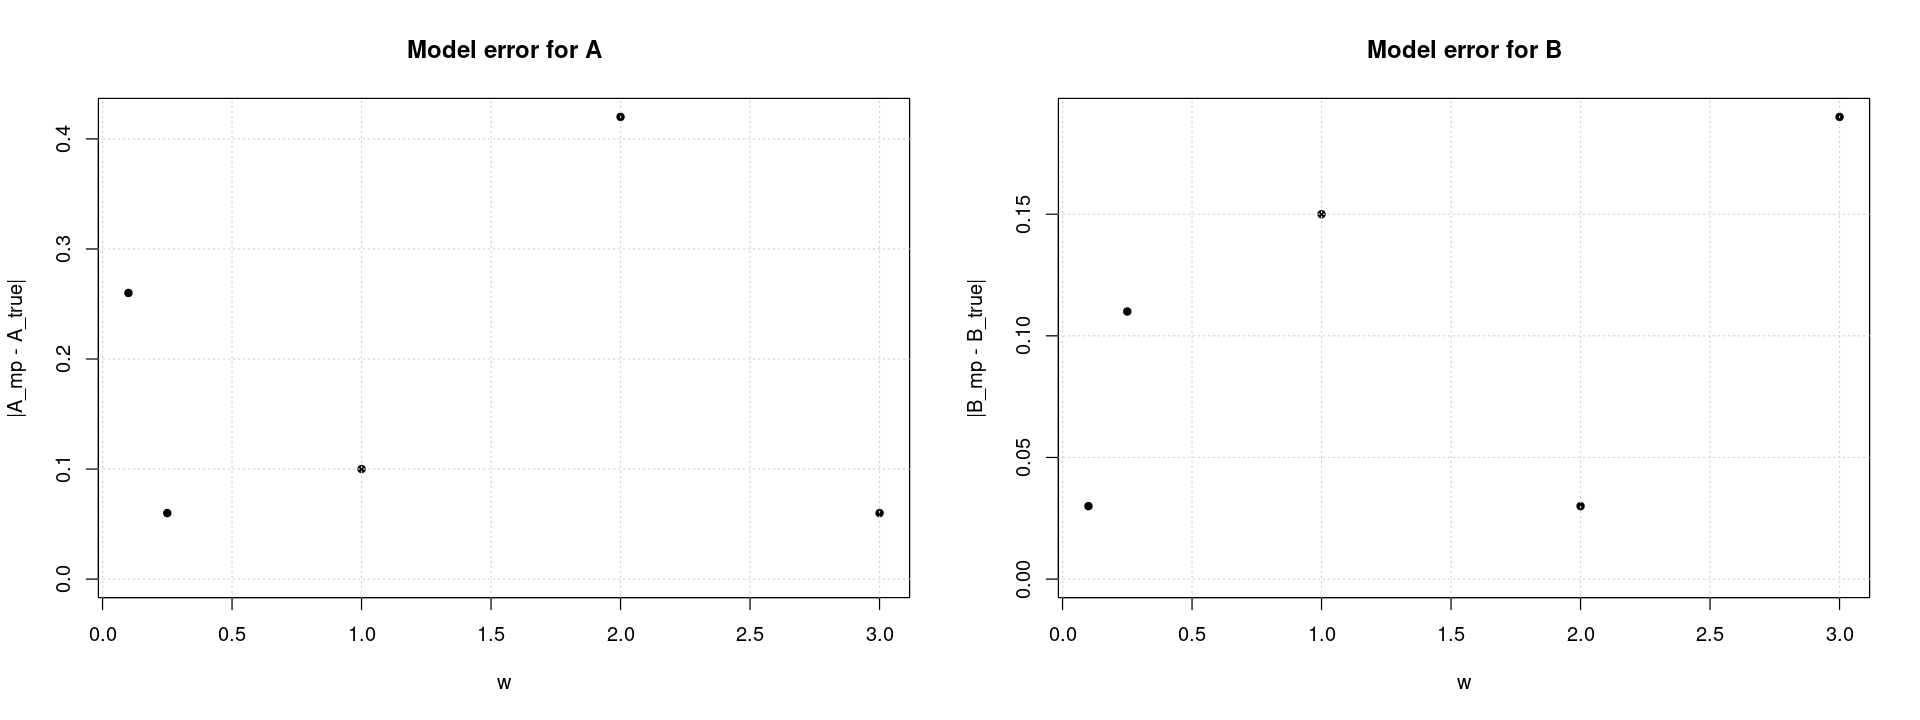

In [7]:
signal <- Vectorize(function(x,a,b,x0,w,t) {
    t* (a*exp(-(x-x0)^2/(2*w^2)) +b)
})

log.post <- function(data, x, a, b, x0, w, t) {
            if(a<0 || b<0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, a, b, x0, w, t), log=TRUE))
            }

x0      <- 0
w_list  <- c(0.1,0.25,1,2,3)
A.true  <- 2
B.true  <- 1
Delta.t <- 5
A.hist <- c(NULL)
B.hist <- c(NULL)

options(repr.plot.width=16, repr.plot.height=12)
m <- rbind(c(1,1,1,1,2,2), c(3,3,3,4,4,4))
layout(m)

for (w in w_list){
    set.seed(1234)
    xdat <- seq(from=-9, to=9, by=w) 
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
         type='l',lty=1, lwd=3, col='blue', ylim=c(min(ddat)-1,max(ddat)+2),
         main=paste("Plot of signal distribution for w =",w))
    
    xdat.off <- xdat - w/2 
    lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
    legend("topleft",c("Number of expected photons","Number of observed photons"), 
           col=c("blue","firebrick3"), lty=1, cex=1,box.lty=0)       
    grid()
    
    alim <- c(0.0, 4.0)
    blim <- c(0, 2)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t) 
    } }  
    z <- z - max(z)    
    
    contour(a, b, exp(z), main=paste("Posterior for w=",w),
            xlim=c(min(0,A.true),max(4,A.true)), ylim=c(min(0.5,B.true),max(1.5,B.true)), xlab="Amplitude_A", 
            ylab="Background_B", nlevels=5)  
    points(A.true,B.true, col='red', pch=19)
    grid()

    legend("topright",c("true position"), 
           col=c("red"), pch=19, pt.cex=1.2, pt.lwd=2)
    
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))    
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    plot(b, p_b_D, xlab="background,B", yaxs="i", lty=1, 
         ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
         type="l", lwd=2, main=paste("Marginalized Posterior over A for w=",w))
    lines(b, p_b_aD, lwd=2, lty=2, col='black') 
    abline(v=B.true, col="grey",lty=1,lwd=3)
    legend("topright",c("P(B|D)","P(B|A,D)","B true"), 
           col=c("black","black","grey"), lty=1:2, pt.cex=1.4, pt.lwd=2,
           cex=1,box.lty=0)
    grid()
    
    plot(a, p_a_D, xlab="amplitude_A", yaxs="i", lty=1, 
         ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
         type="l", lwd=2, main=paste("Marginalized Posterior over B for w=",w))
    lines(a, p_a_bD, lwd=2, lty=2,col='black') 
    abline(v=A.true, col="grey",lty=1,lwd=3)
    grid()
    legend("topright",c("P(A|D)","P(A|B,D)","A true"), 
           col=c("black","black","grey"), lty=1:2, pt.cex=1.4, pt.lwd=2,
           cex=1,box.lty=0)
    index <- c(which(z==max(z), arr.ind=TRUE))
    A.hist <- c(A.hist,a[index[1]])
    B.hist <- c(B.hist,b[index[2]])

}

options(repr.plot.width=16, repr.plot.height=6)
par(mfcol=c(1,2))
plot(w_list, abs(A.hist-A.true), xlab="w", pch=20, ylab="|A_mp - A_true|", ylim=c(0,max(abs(A.hist-A.true))),
         type="p", lwd=2, main="Model error for A")
grid()

plot(w_list, abs(B.hist-B.true), xlab="w", pch=20, ylab="|B_mp - B_true|", ylim=c(0,max(abs(B.hist-B.true))),
         type="p", lwd=2, main="Model error for B")
grid()

#### 3.b)

Vary the ratio of $A/B$

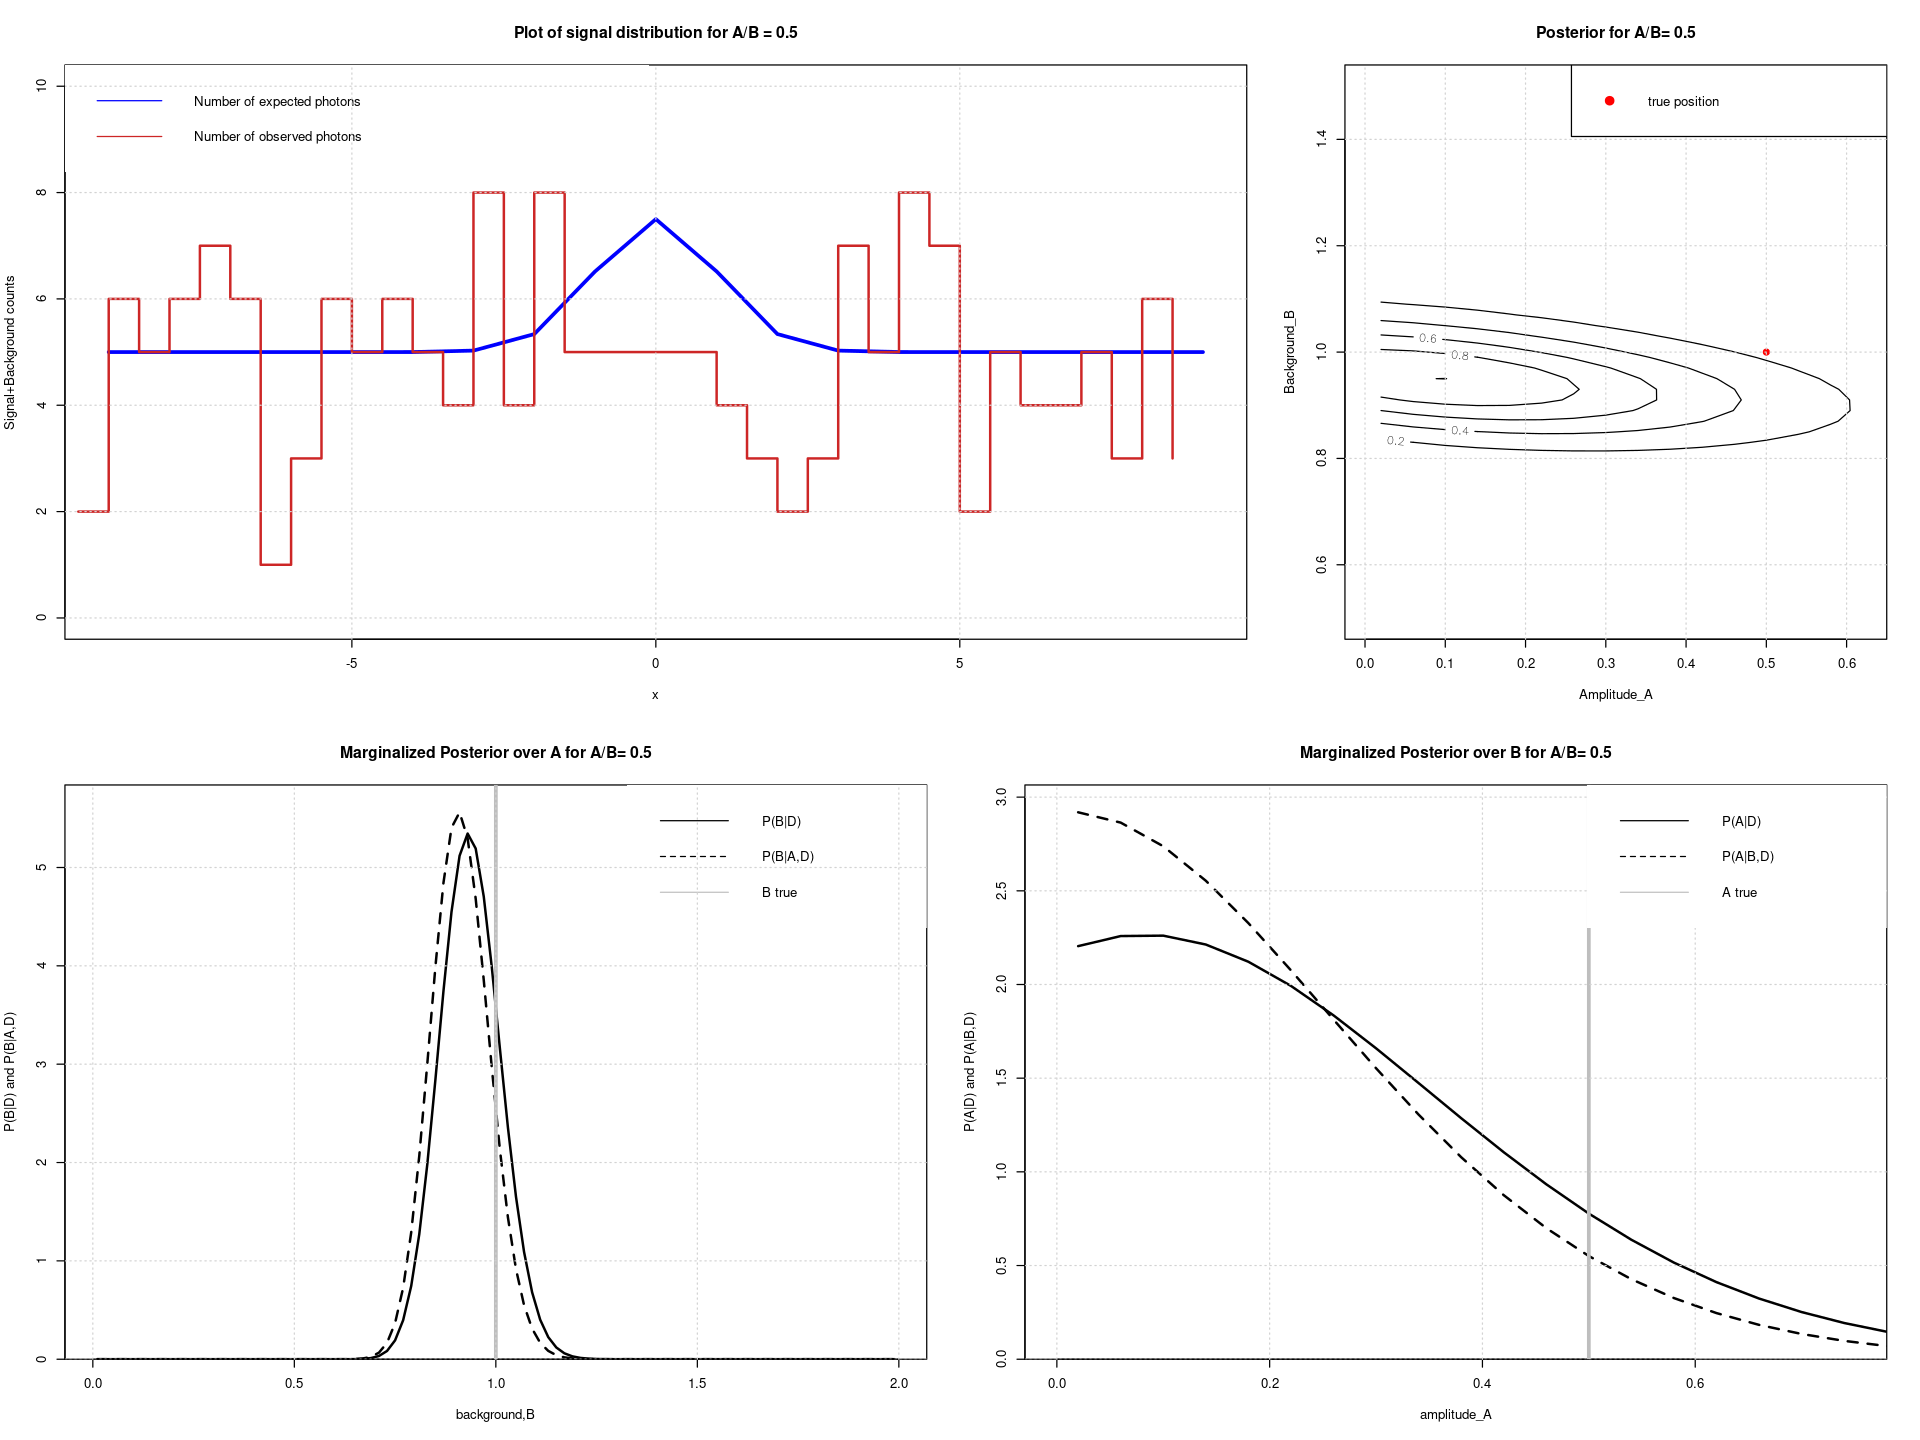

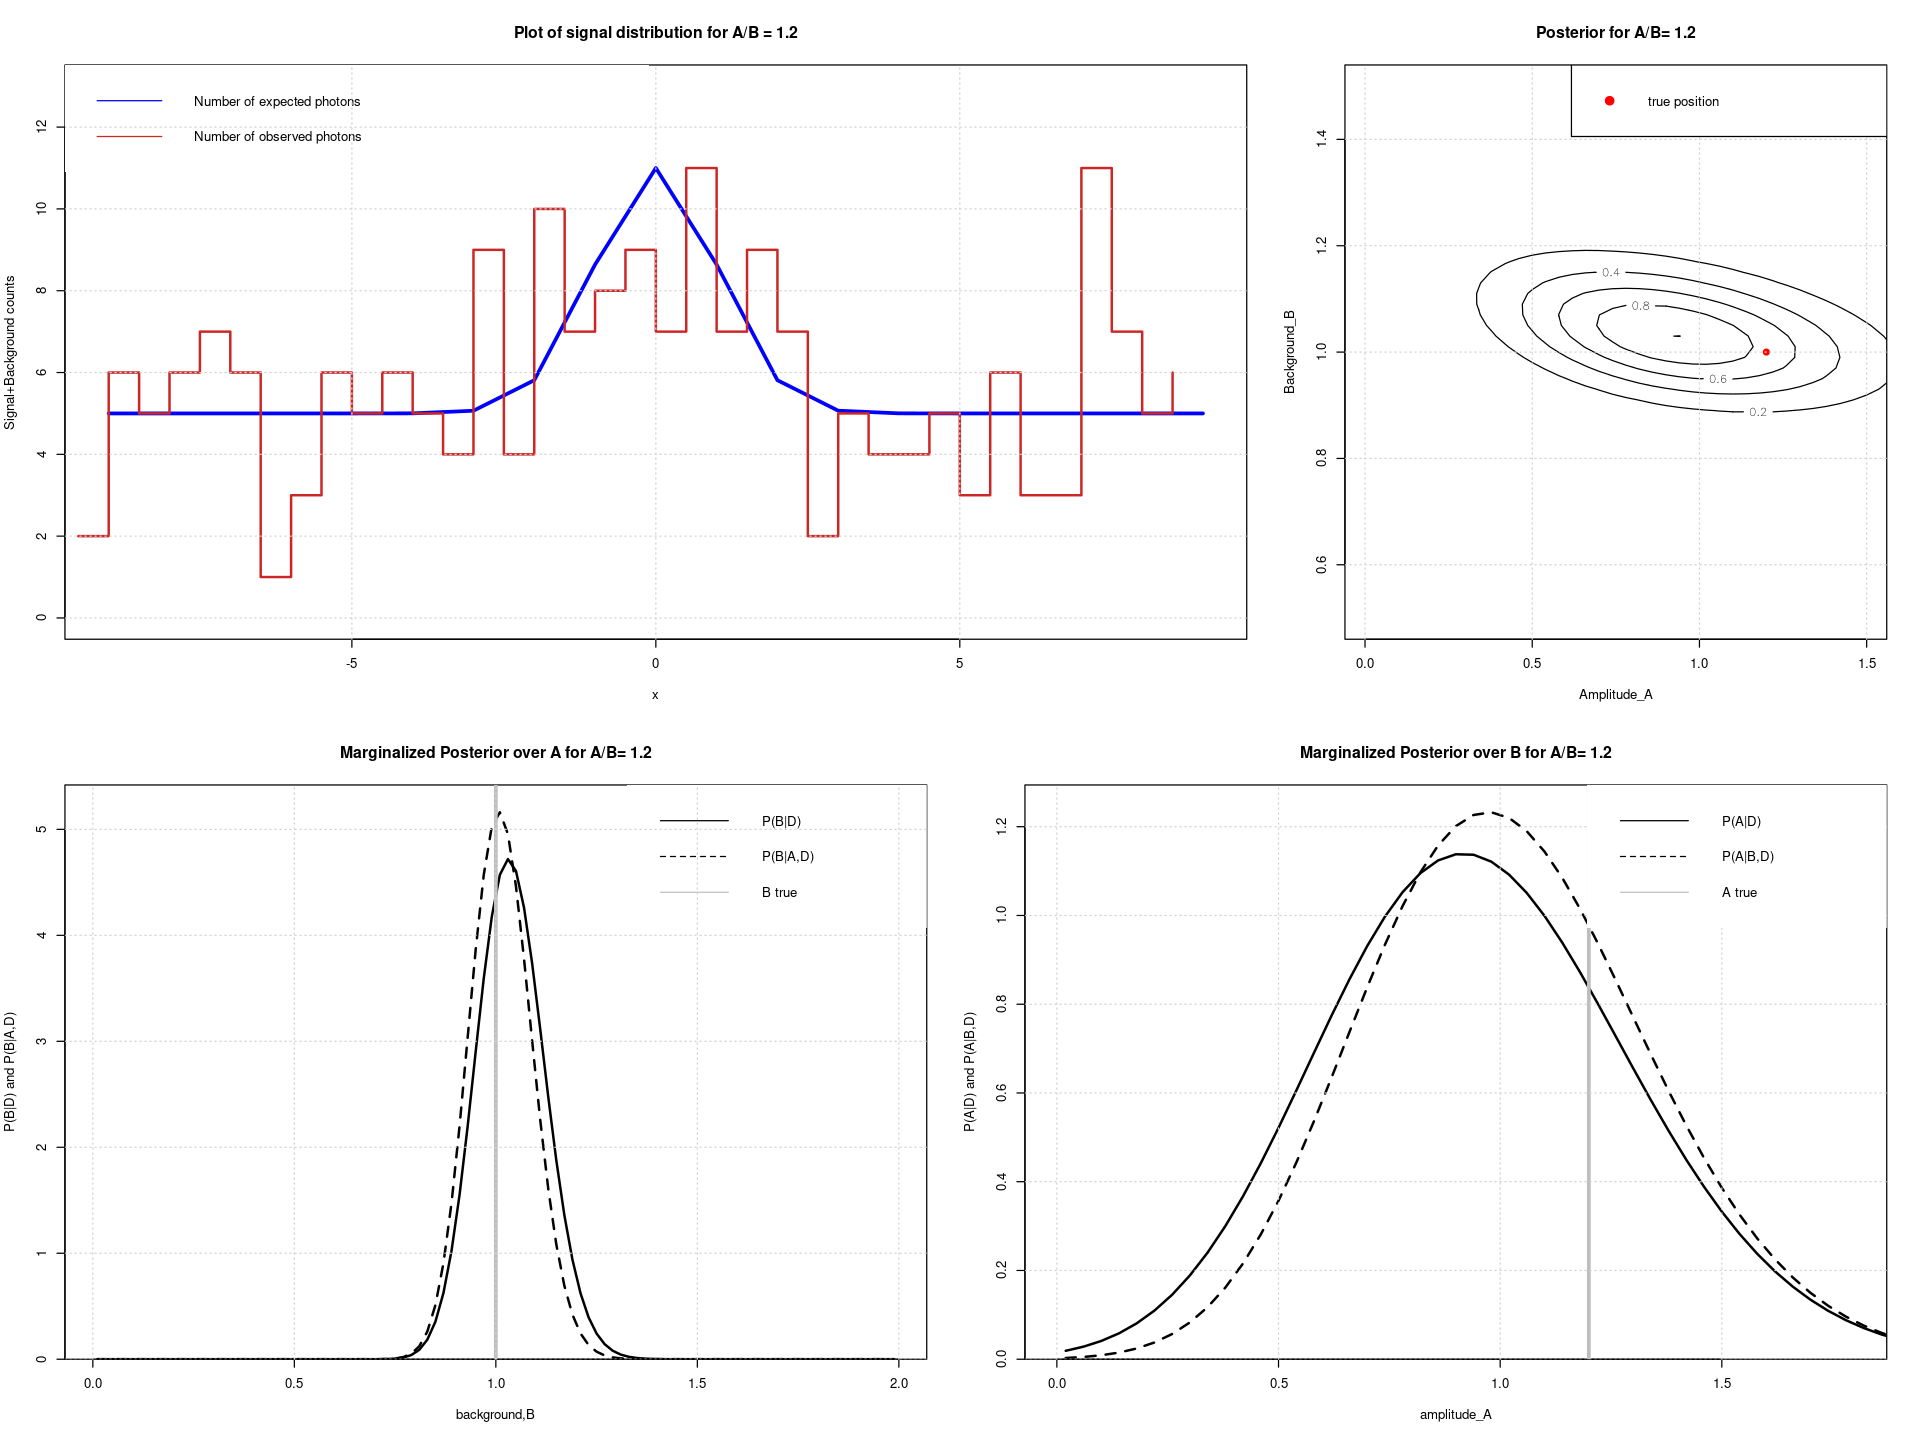

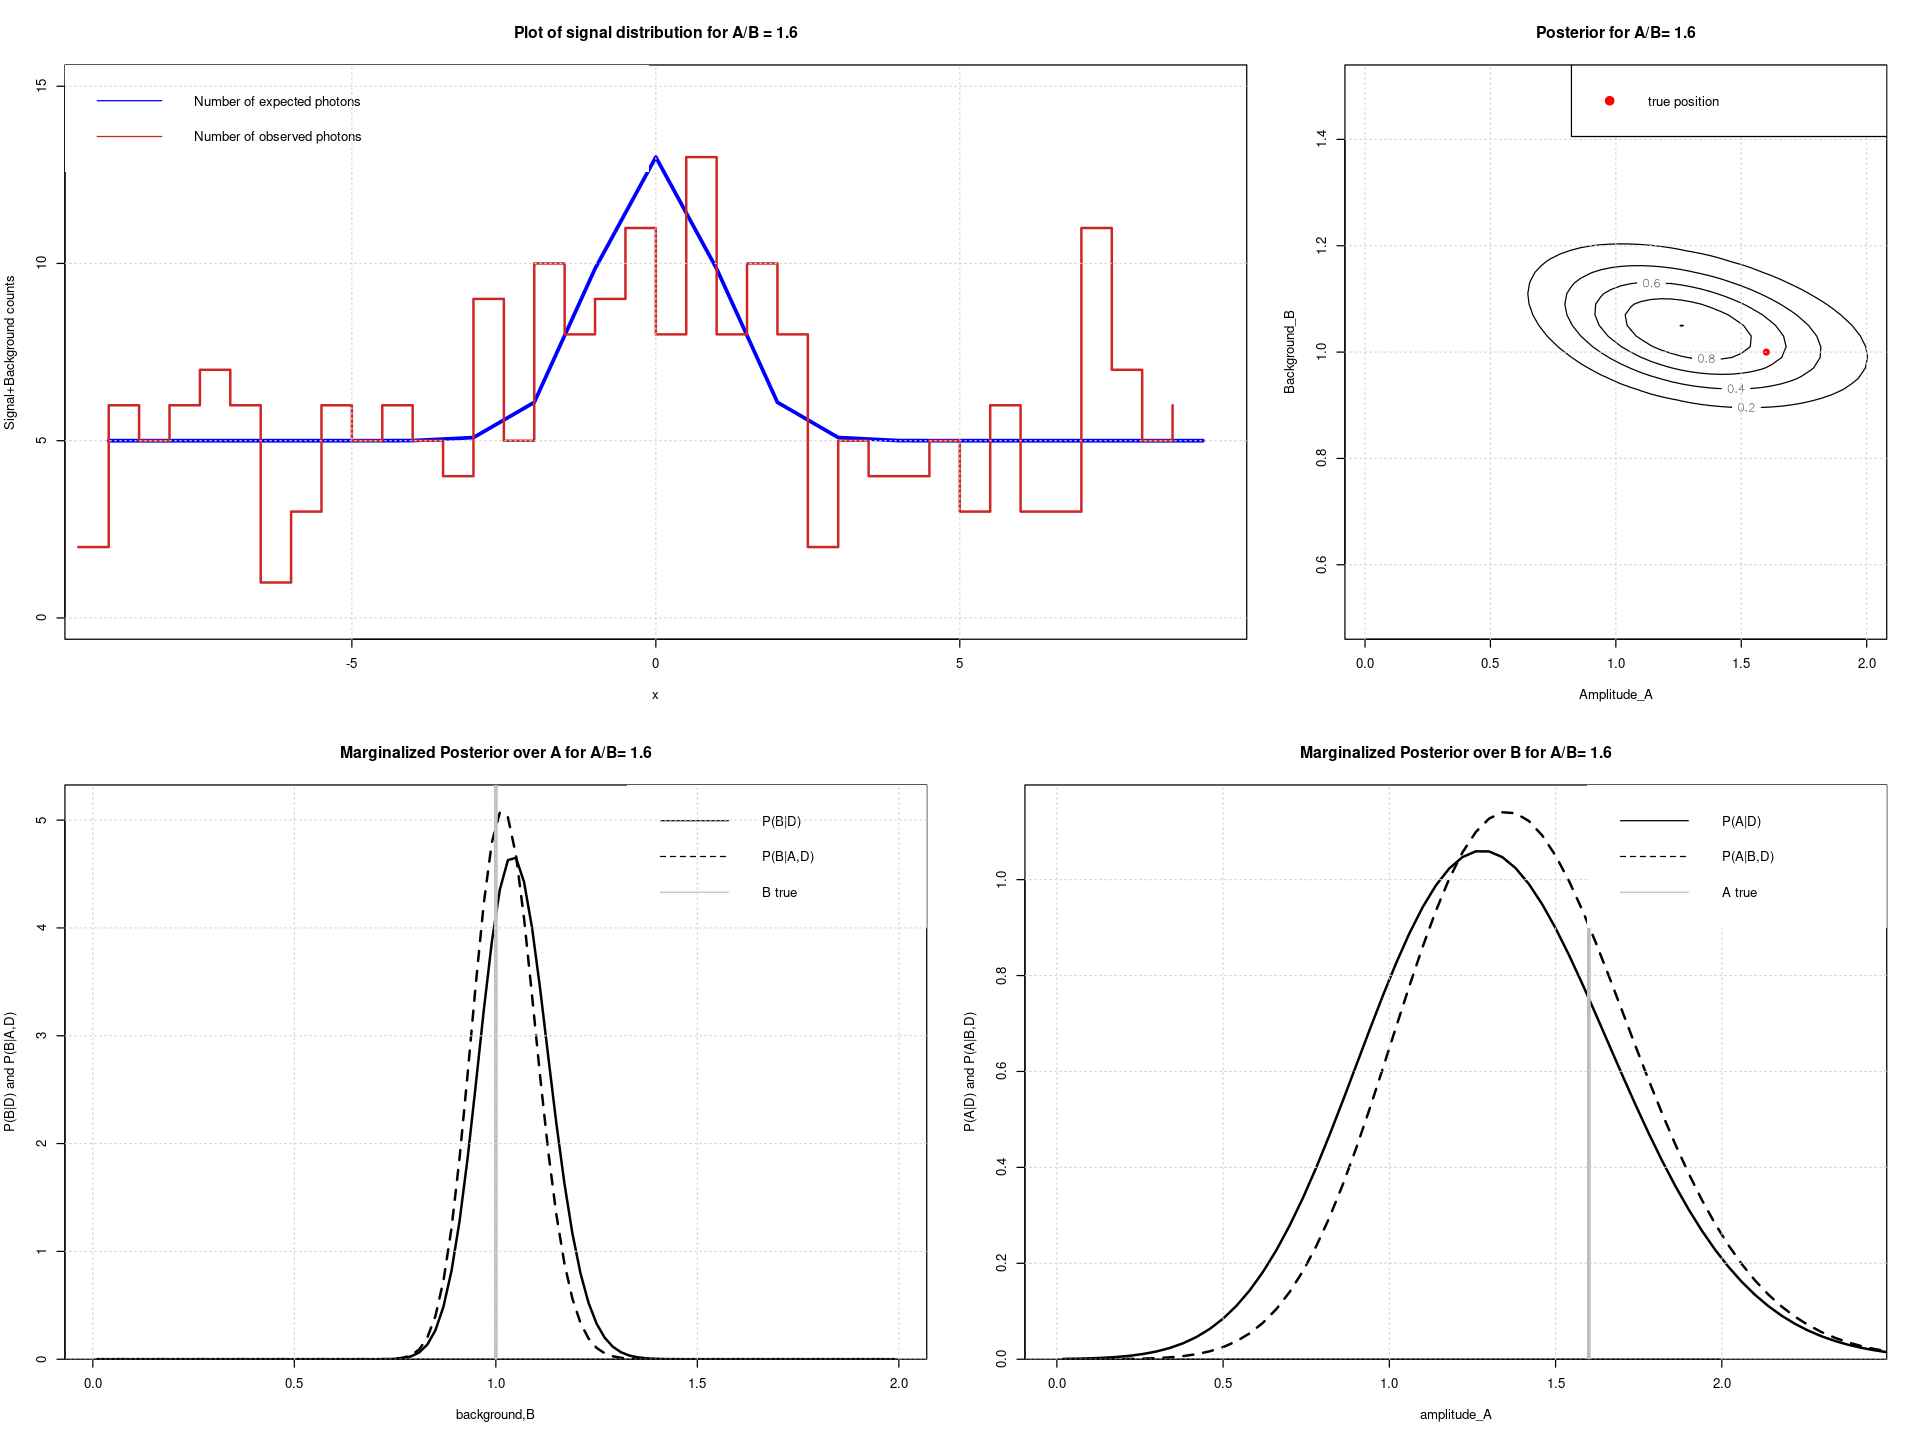

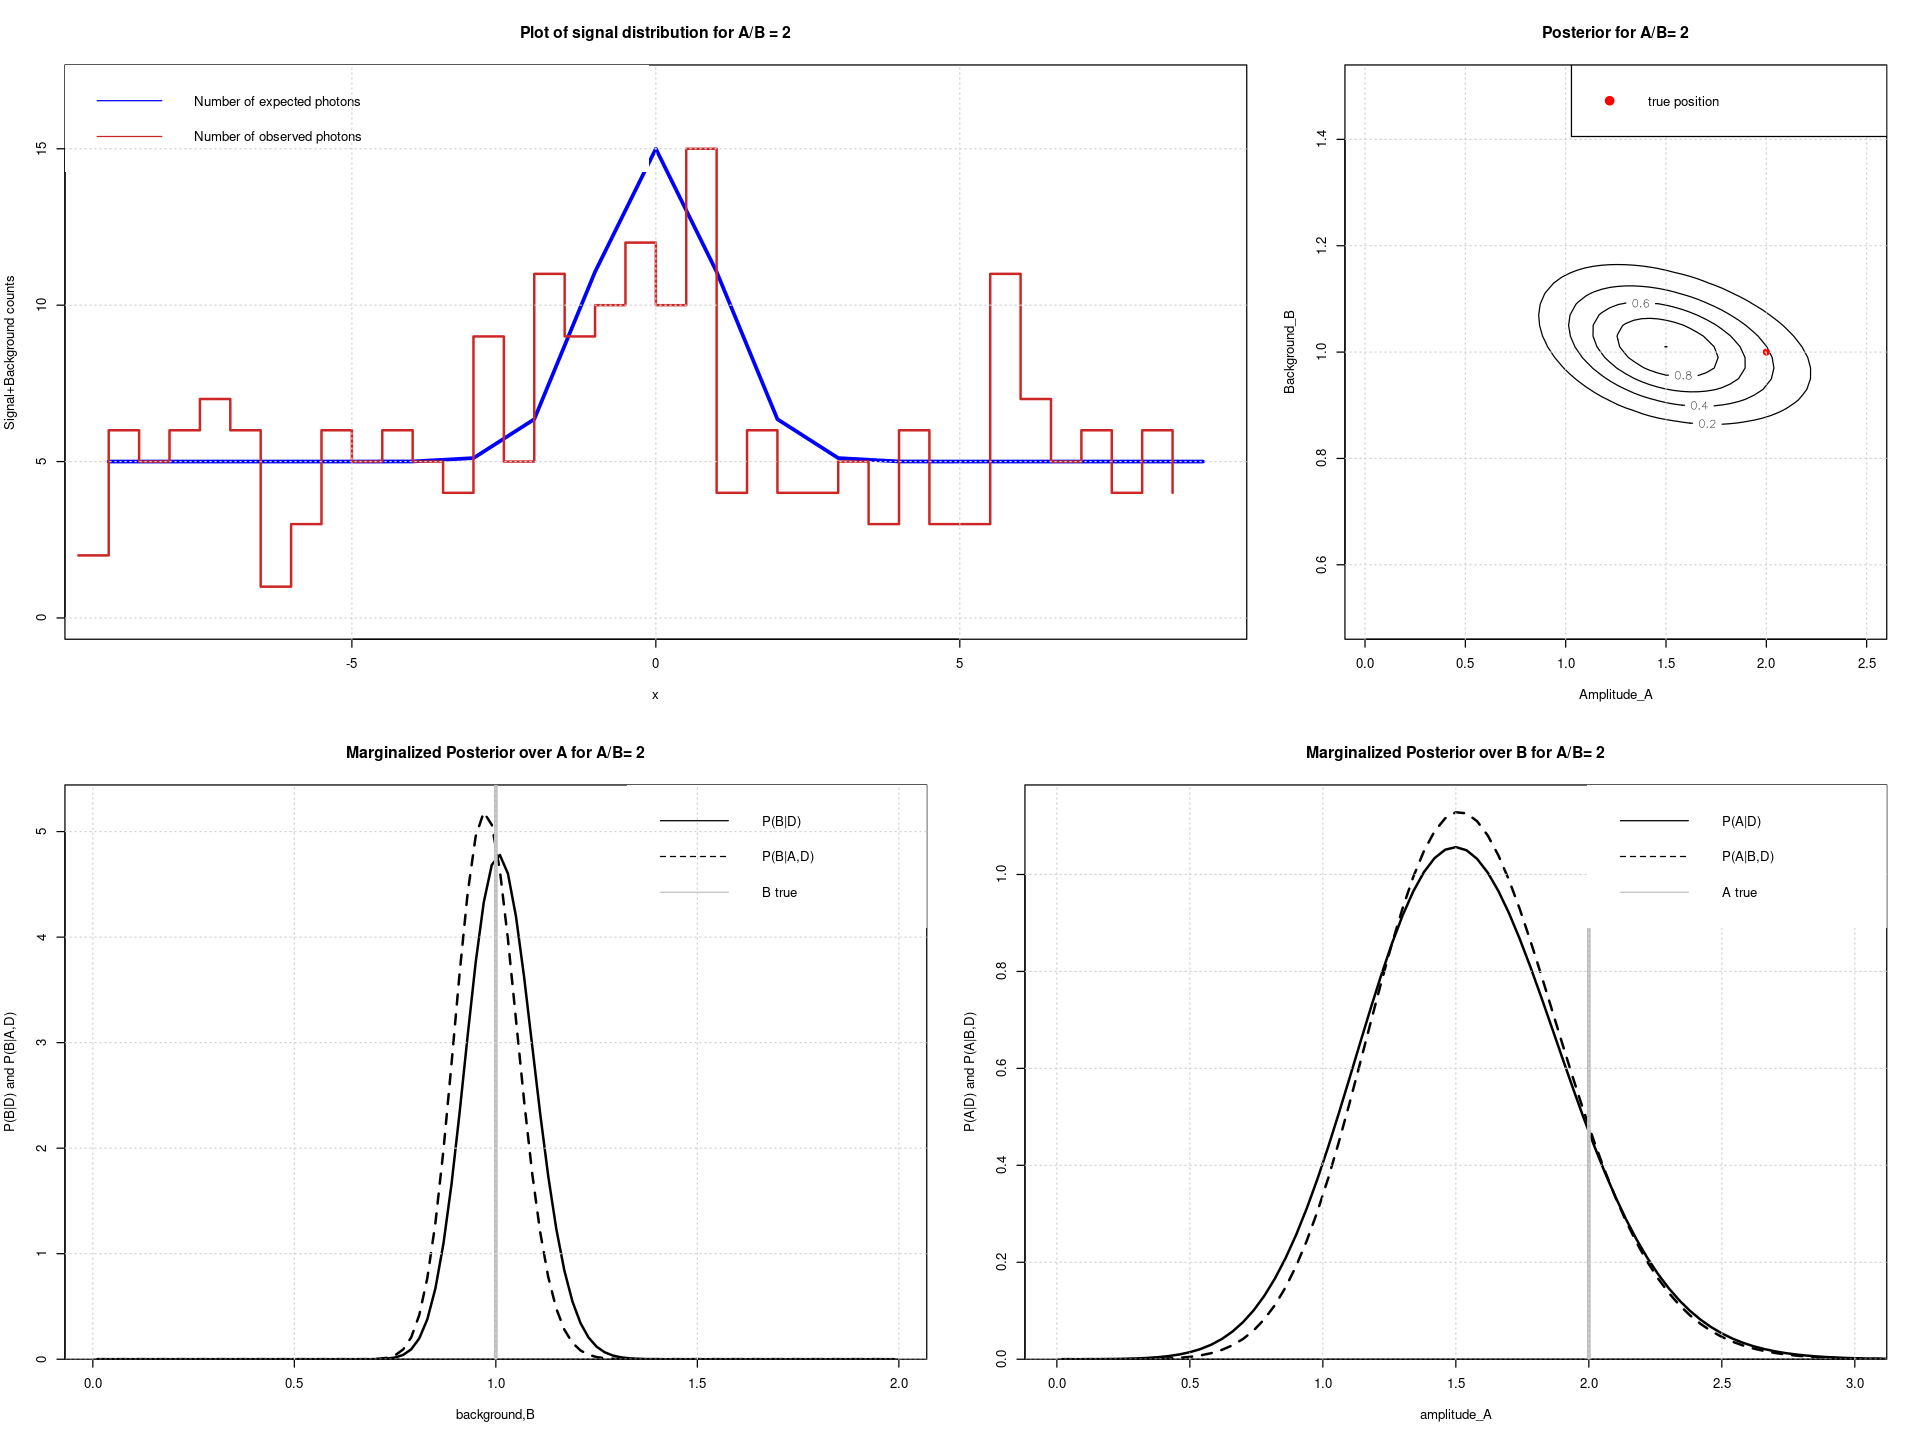

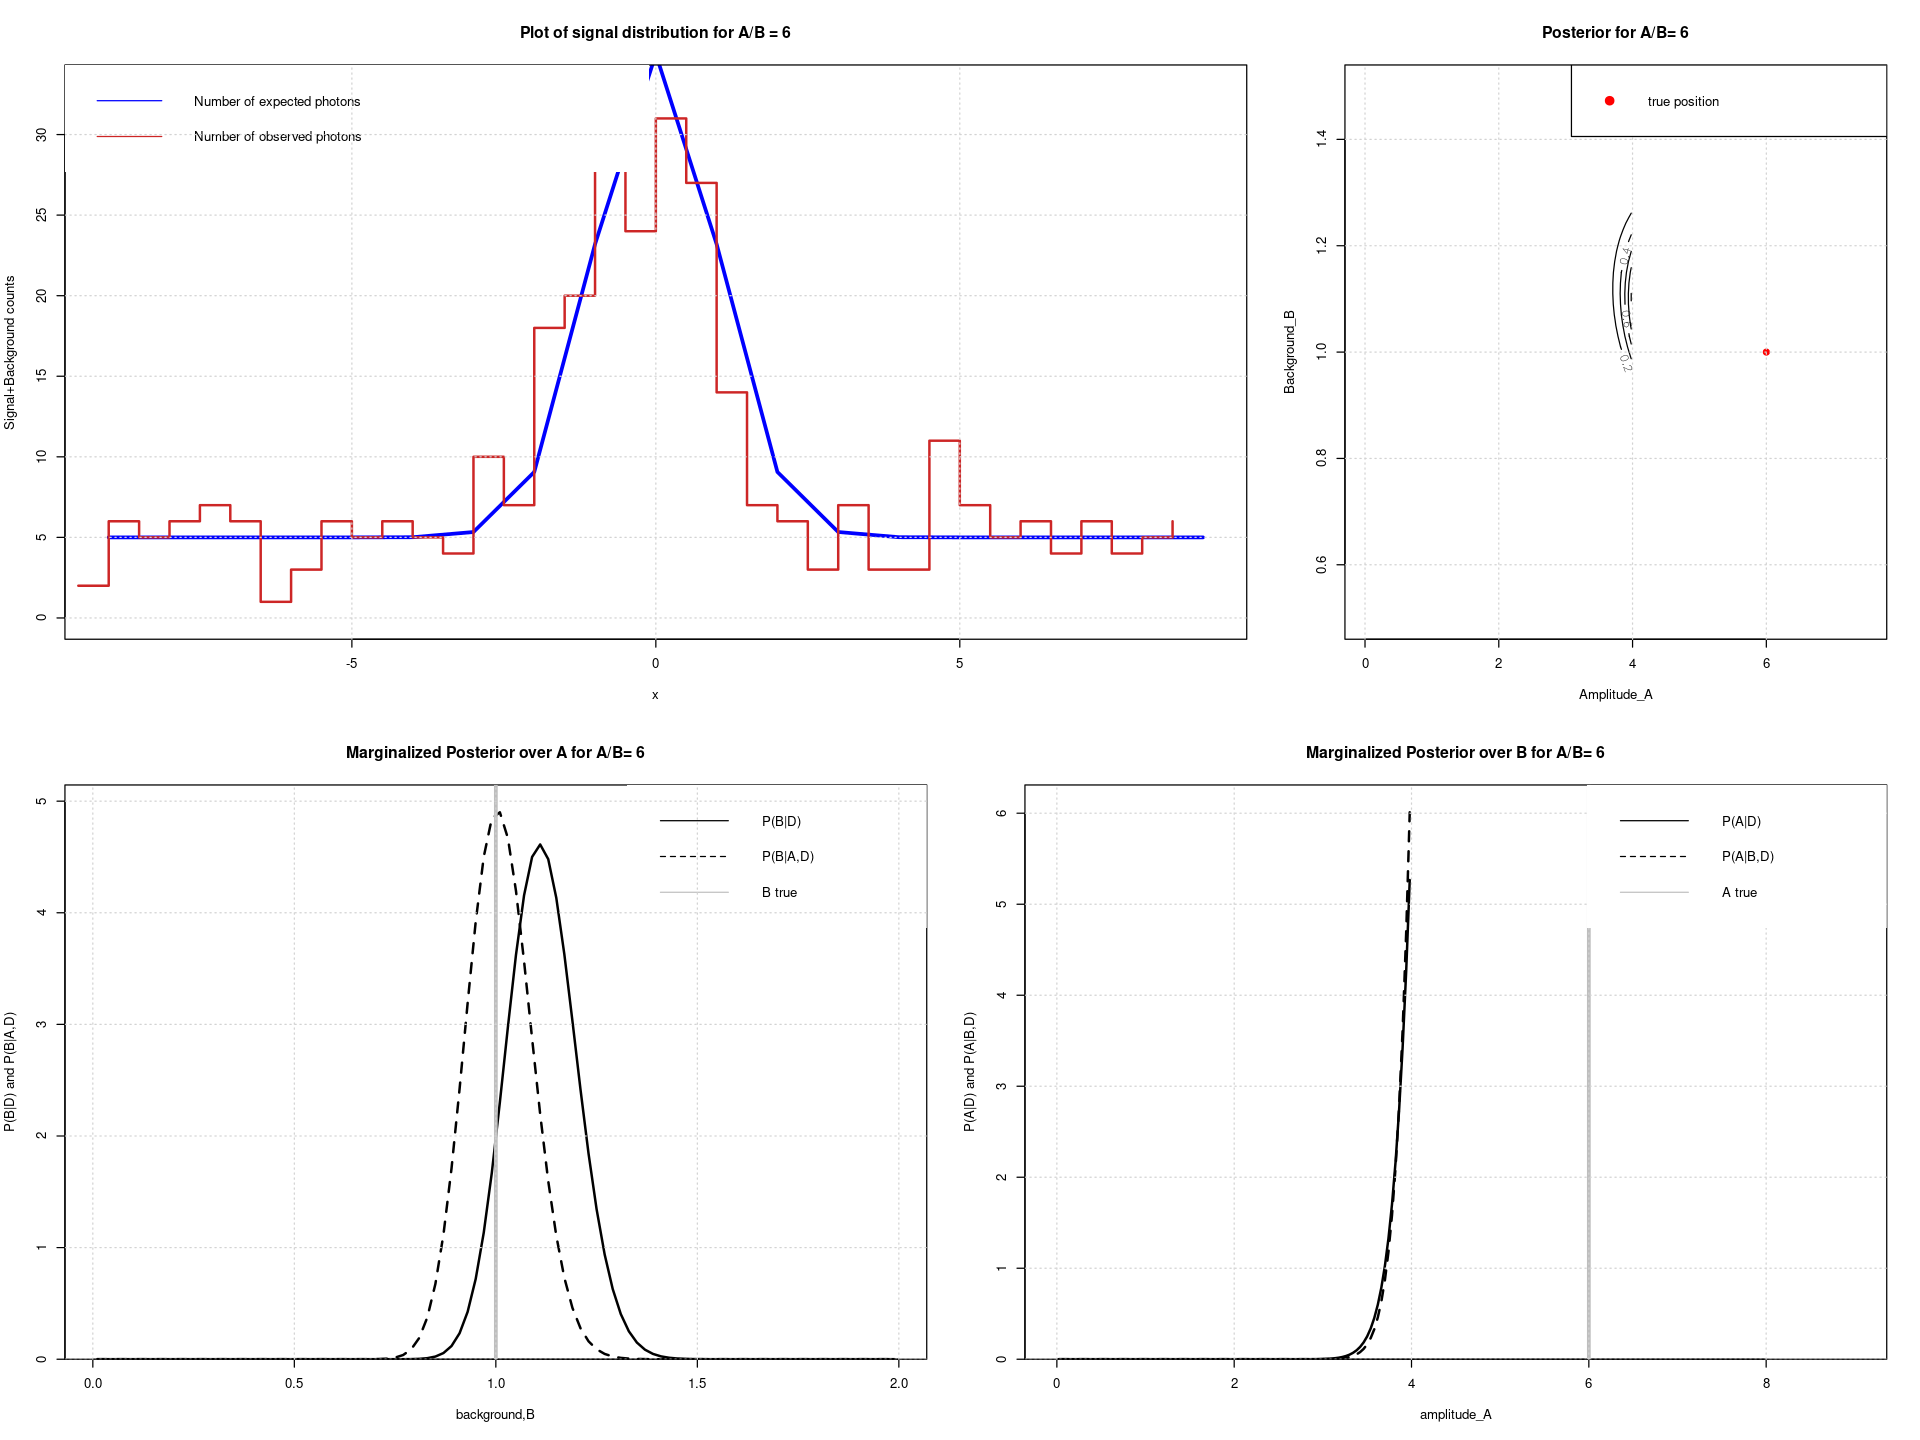

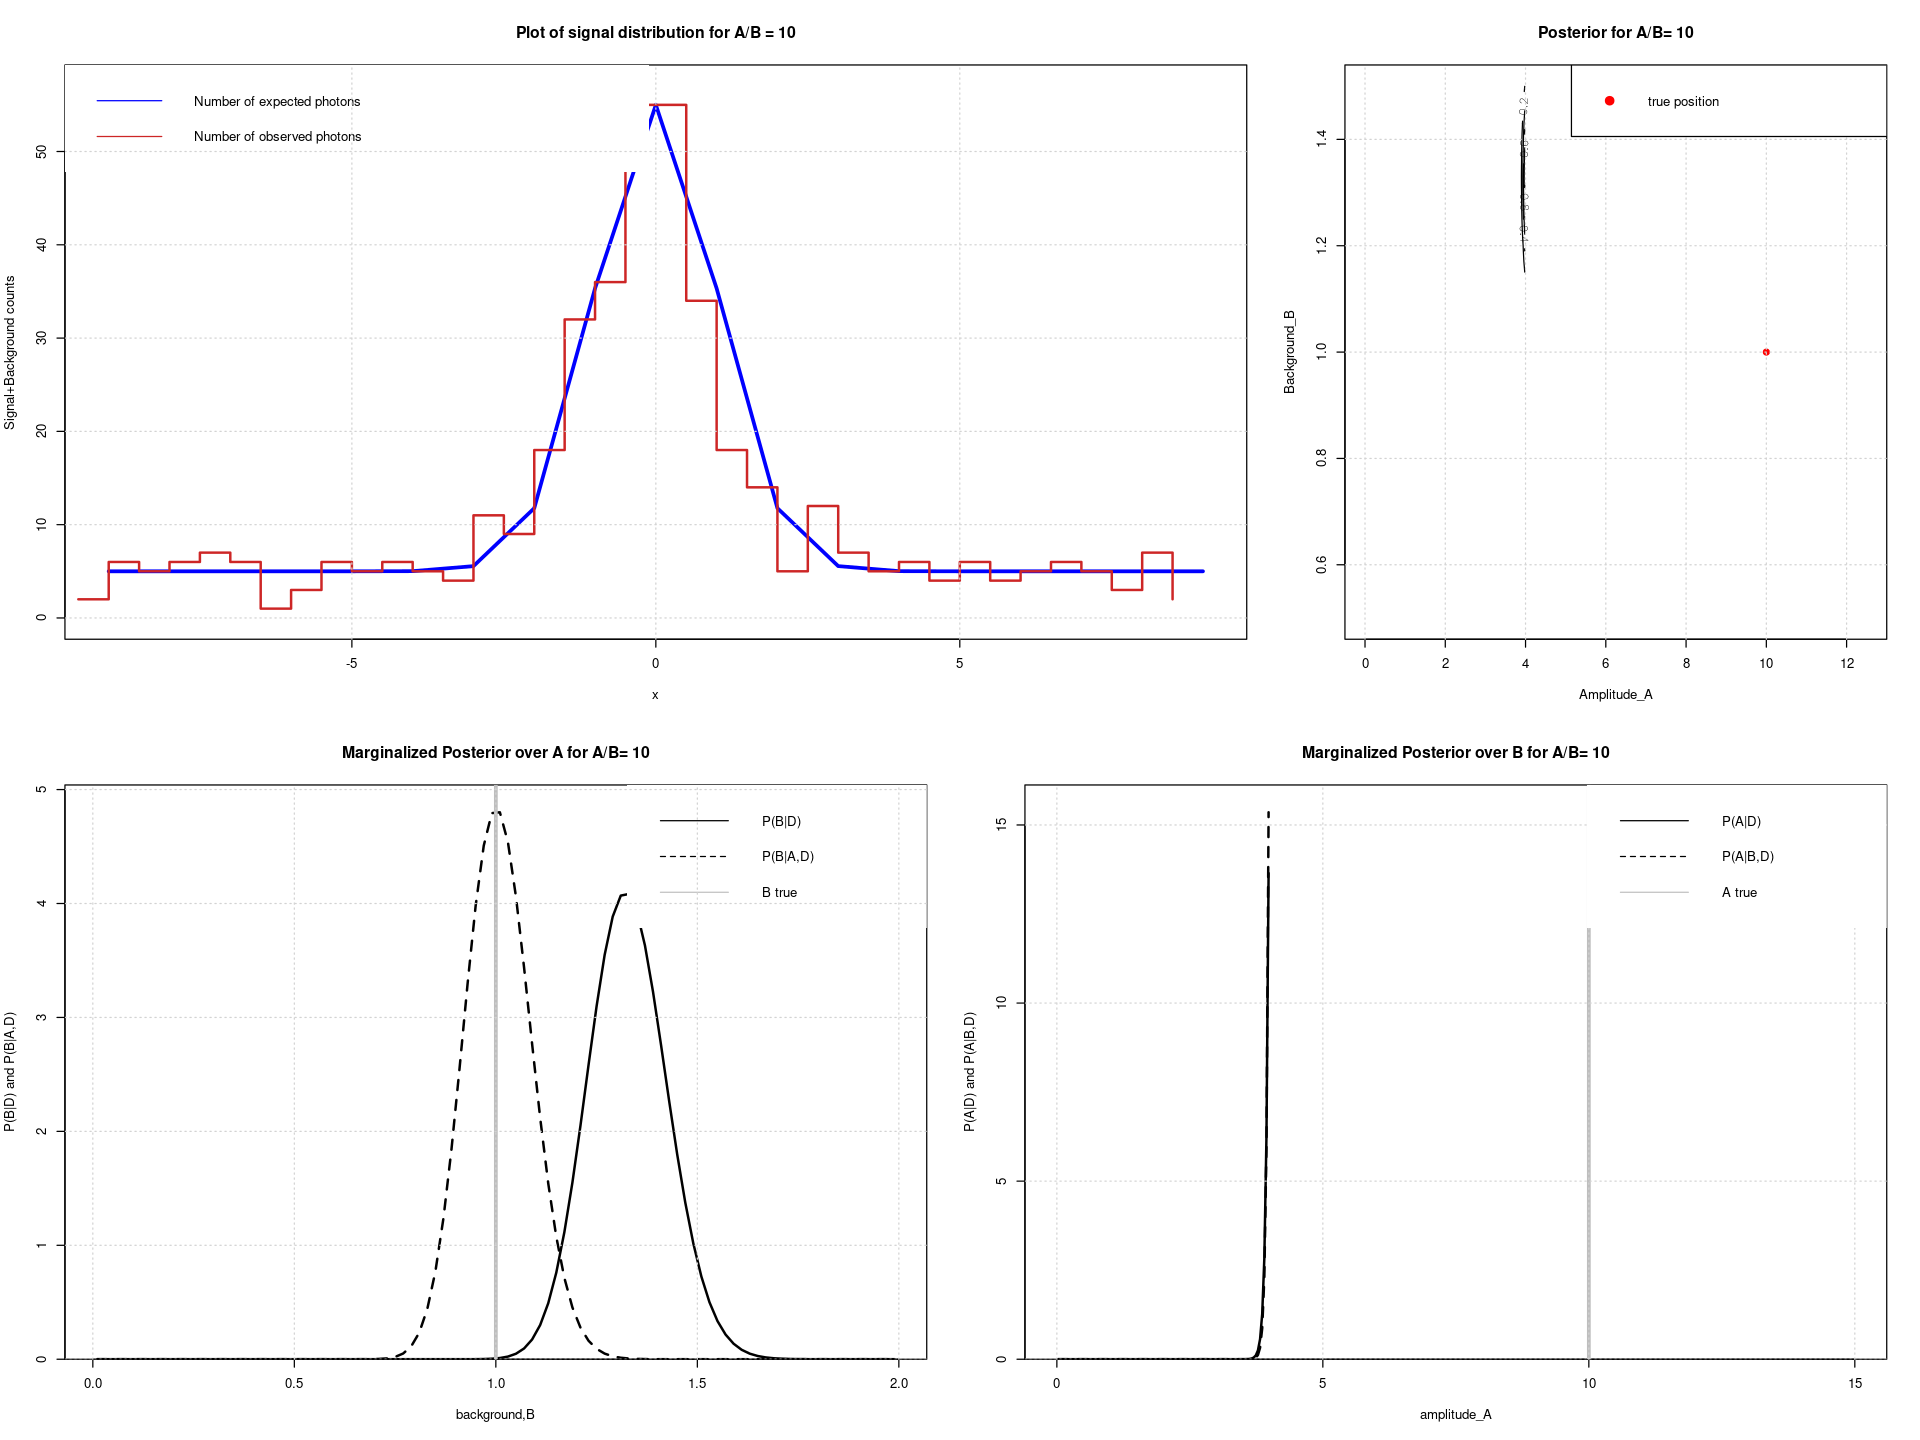

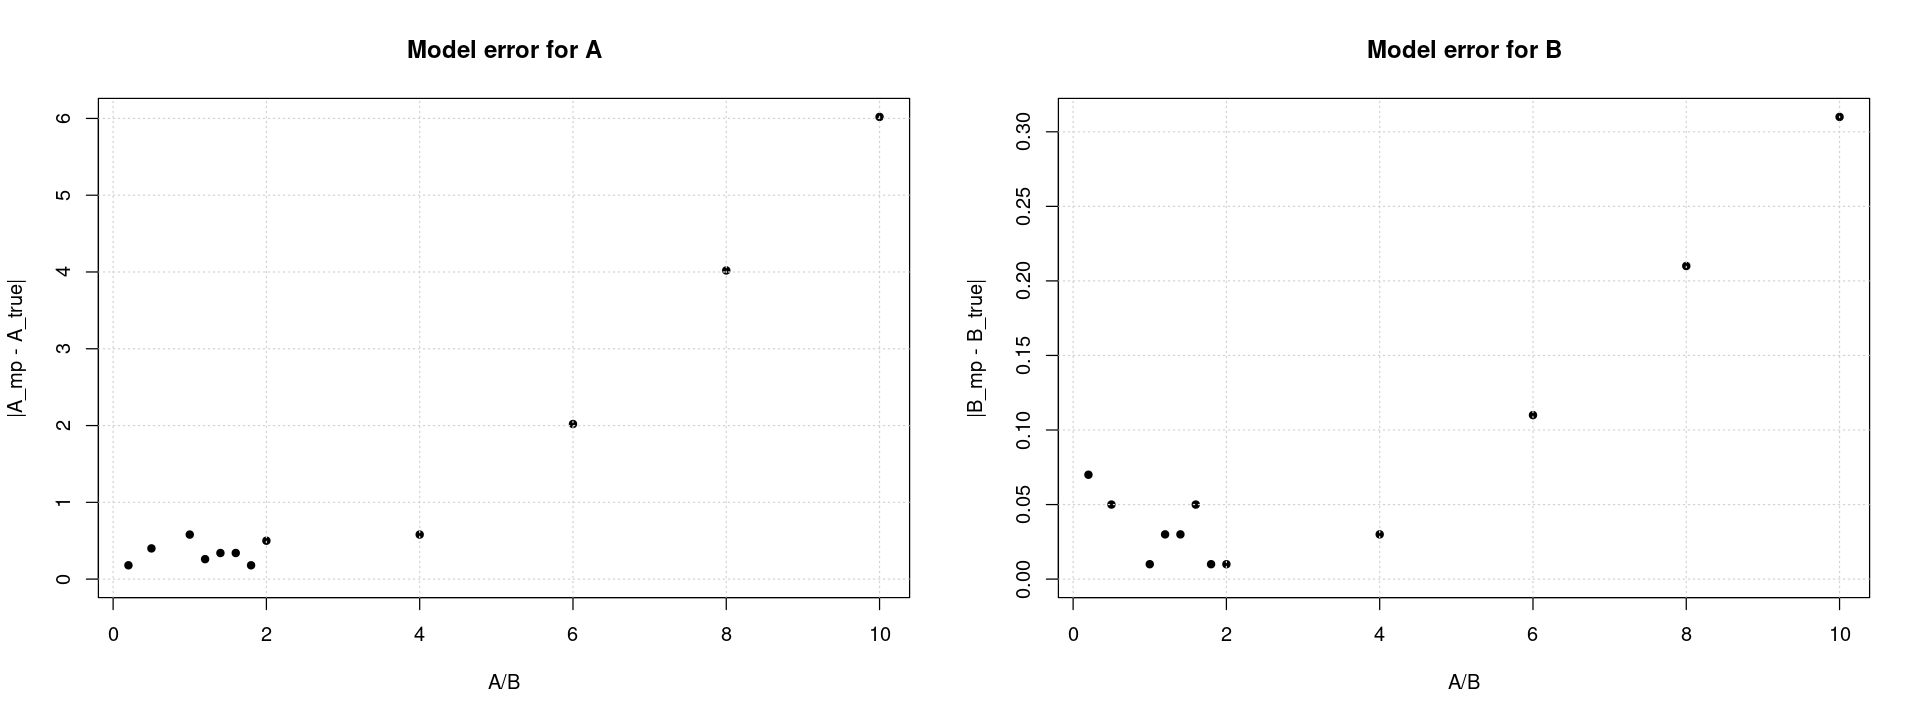

In [8]:
signal <- Vectorize(function(x,a,b,x0,w,t) {
    t* (a*exp(-(x-x0)^2/(2*w^2)) +b)
})

log.post <- function(data, x, a, b, x0, w, t) {
            if(a<0 || b<0) {return(-Inf)} # the effect of the prior 
                sum(dpois(data, lambda=signal(x, a, b, x0, w, t), log=TRUE))
            }

x0      <- 0
w       <- 1
B.true  <- 1
Delta.t <- 5
ratio   <- c(0.2,0.5,1,1.2,1.4,1.6,1.8,2,4,6,8,10)
count   <- 0

A.hist <- c(NULL)
B.hist <- c(NULL)
A.true.hist <- c(NULL)
B.true.hist <- c(NULL)

options(repr.plot.width=16, repr.plot.height=12)
m <- rbind(c(1,1,1,1,2,2), c(3,3,3,4,4,4))
layout(m)

for (r in ratio){
    count <- count+1
    A.true <- r*B.true
    set.seed(1234)
    xdat <- seq(from=-9, to=9, by=w*0.5) 
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    if (count%%2 ==0){
        xplot <- seq(from=min(xdat), to=max(xdat), by=w) 
        splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
        plot(xplot, splot, xlab="x", ylab="Signal+Background counts",
             type='l',lty=1, lwd=3, col='blue', ylim=c(min(ddat)-1,max(ddat)+2),
             main=paste("Plot of signal distribution for A/B =",r))

        xdat.off <- xdat - w/2 
        lines(xdat.off, ddat, type='s',col='firebrick3', lwd=2)
        legend("topleft",c("Number of expected photons","Number of observed photons"), 
               col=c("blue","firebrick3"), lty=1, cex=1,box.lty=0)       
        grid()}
    
    alim <- c(0.0, 4.0)
    blim <- c(0, 2)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t) 
    } }  
    z <- z - max(z)    
    
    if (count%%2 ==0){
        contour(a, b, exp(z), main=paste("Posterior for A/B=",r),
                xlab="Amplitude_A", xlim= c(min(0,A.true),max(A.true + A.true/4 ,A.true)),
                ylab="Background_B",ylim=c(min(0.5,B.true),max(1.5,B.true)), nlevels=5)  
        points(A.true,B.true, col='red', pch=19)
        grid()

        legend("topright",c("true position"), 
               col=c("red"), pch=19, pt.cex=1.2, pt.lwd=2)

        p_a_D <- apply(exp(z), 1, sum)
        p_a_D <- p_a_D/(delta_a*sum(p_a_D))
        p_b_D <- apply(exp(z), 2, sum) 
        p_b_D <- p_b_D/(delta_b*sum(p_b_D))

        p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
        p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
        p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))    
        p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))

        plot(b, p_b_D, xlab="background,B", yaxs="i", lty=1, 
             ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",
             type="l", lwd=2, main=paste("Marginalized Posterior over A for A/B=",r))
        lines(b, p_b_aD, lwd=2, lty=2, col='black') 
        abline(v=B.true, col="grey",lty=1,lwd=3)
        legend("topright",c("P(B|D)","P(B|A,D)","B true"), 
               col=c("black","black","grey"), lty=1:2, pt.cex=1.4, pt.lwd=2,
               cex=1,box.lty=0)
        grid()

        plot(a, p_a_D, xlab="amplitude_A", yaxs="i", lty=1, 
             ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", 
             xlim=c(0,3*A.true/2),
             type="l", lwd=2, main=paste("Marginalized Posterior over B for A/B=",r))
        lines(a, p_a_bD, lwd=2, lty=2,col='black') 
        abline(v=A.true, col="grey",lty=1,lwd=3)
        grid()
        legend("topright",c("P(A|D)","P(A|B,D)","A true"), 
               col=c("black","black","grey"), lty=1:2, pt.cex=1.4, pt.lwd=2,
               cex=1,box.lty=0)}
    index <- c(which(z==max(z), arr.ind=TRUE))
    A.hist <- c(A.hist,a[index[1]])
    B.hist <- c(B.hist,b[index[2]])
    A.true.hist <- c(A.true.hist,A.true)
    B.true.hist <- c(B.true.hist,B.true)

}

options(repr.plot.width=16, repr.plot.height=6)
par(mfcol=c(1,2))
plot(ratio, abs(A.hist-A.true.hist), xlab="A/B", pch=20, ylab="|A_mp - A_true|", 
         ylim=c(0,max(abs(A.hist-A.true.hist))),
         type="p", lwd=2, main="Model error for A")
grid()

plot(ratio, abs(B.hist-B.true.hist), xlab="A/B", pch=20, ylab="|B_mp - B_true|", 
         ylim=c(0,max(abs(B.hist-B.true.hist))),
         type="p", lwd=2, main="Model error for B")
grid()